

---


**MÁSTER UNIVERSITARIO EN DATA ANALYTICS FOR BUSINESS** | **UPF Barcelona School of Management** | **Curso 2023-2024**

**Trabajo Final de Máster**

**Título del proyecto**: Vía Segura: Análisis de datos para la seguridad vial en Barcelona

**Script**: Clustering

**Autores**: Joel Bullich Esquerra y Pablo García Prado

**Mentora**: Alexandra Abós Ortega


---




## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
# from scipy import stats
# import os
# import random
# import folium
# from tabulate import tabulate

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [2]:
# Ruta del archivo
path = "/content/drive/MyDrive/TFM/clean_data/df_encoded.csv"

# Cargar el archivo en un DataFrame
df = pd.read_csv(path)

df.shape

(62308, 76)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62308 entries, 0 to 62307
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Numero_expedient                 62308 non-null  object
 1   Codi_carrer                      62308 non-null  int64 
 2   Descripcio_dia_setmana           62308 non-null  int64 
 3   Any                              62308 non-null  int64 
 4   Mes_any                          62308 non-null  int64 
 5   Dia_mes                          62308 non-null  int64 
 6   Hora_dia                         62308 non-null  int64 
 7   Descripcio_torn                  62308 non-null  int64 
 8   Numero_morts                     62308 non-null  int64 
 9   Numero_lesionats_lleus           62308 non-null  int64 
 10  Numero_lesionats_greus           62308 non-null  int64 
 11  Numero_victimes                  62308 non-null  int64 
 12  Numero_vehicles_implicats       

## Clustering

#### Matriz de correlación

In [4]:
# Filtrar el DataFrame solo con las columnas para el clustering
df_clustering = df.drop(['Numero_expedient'], axis = 1)

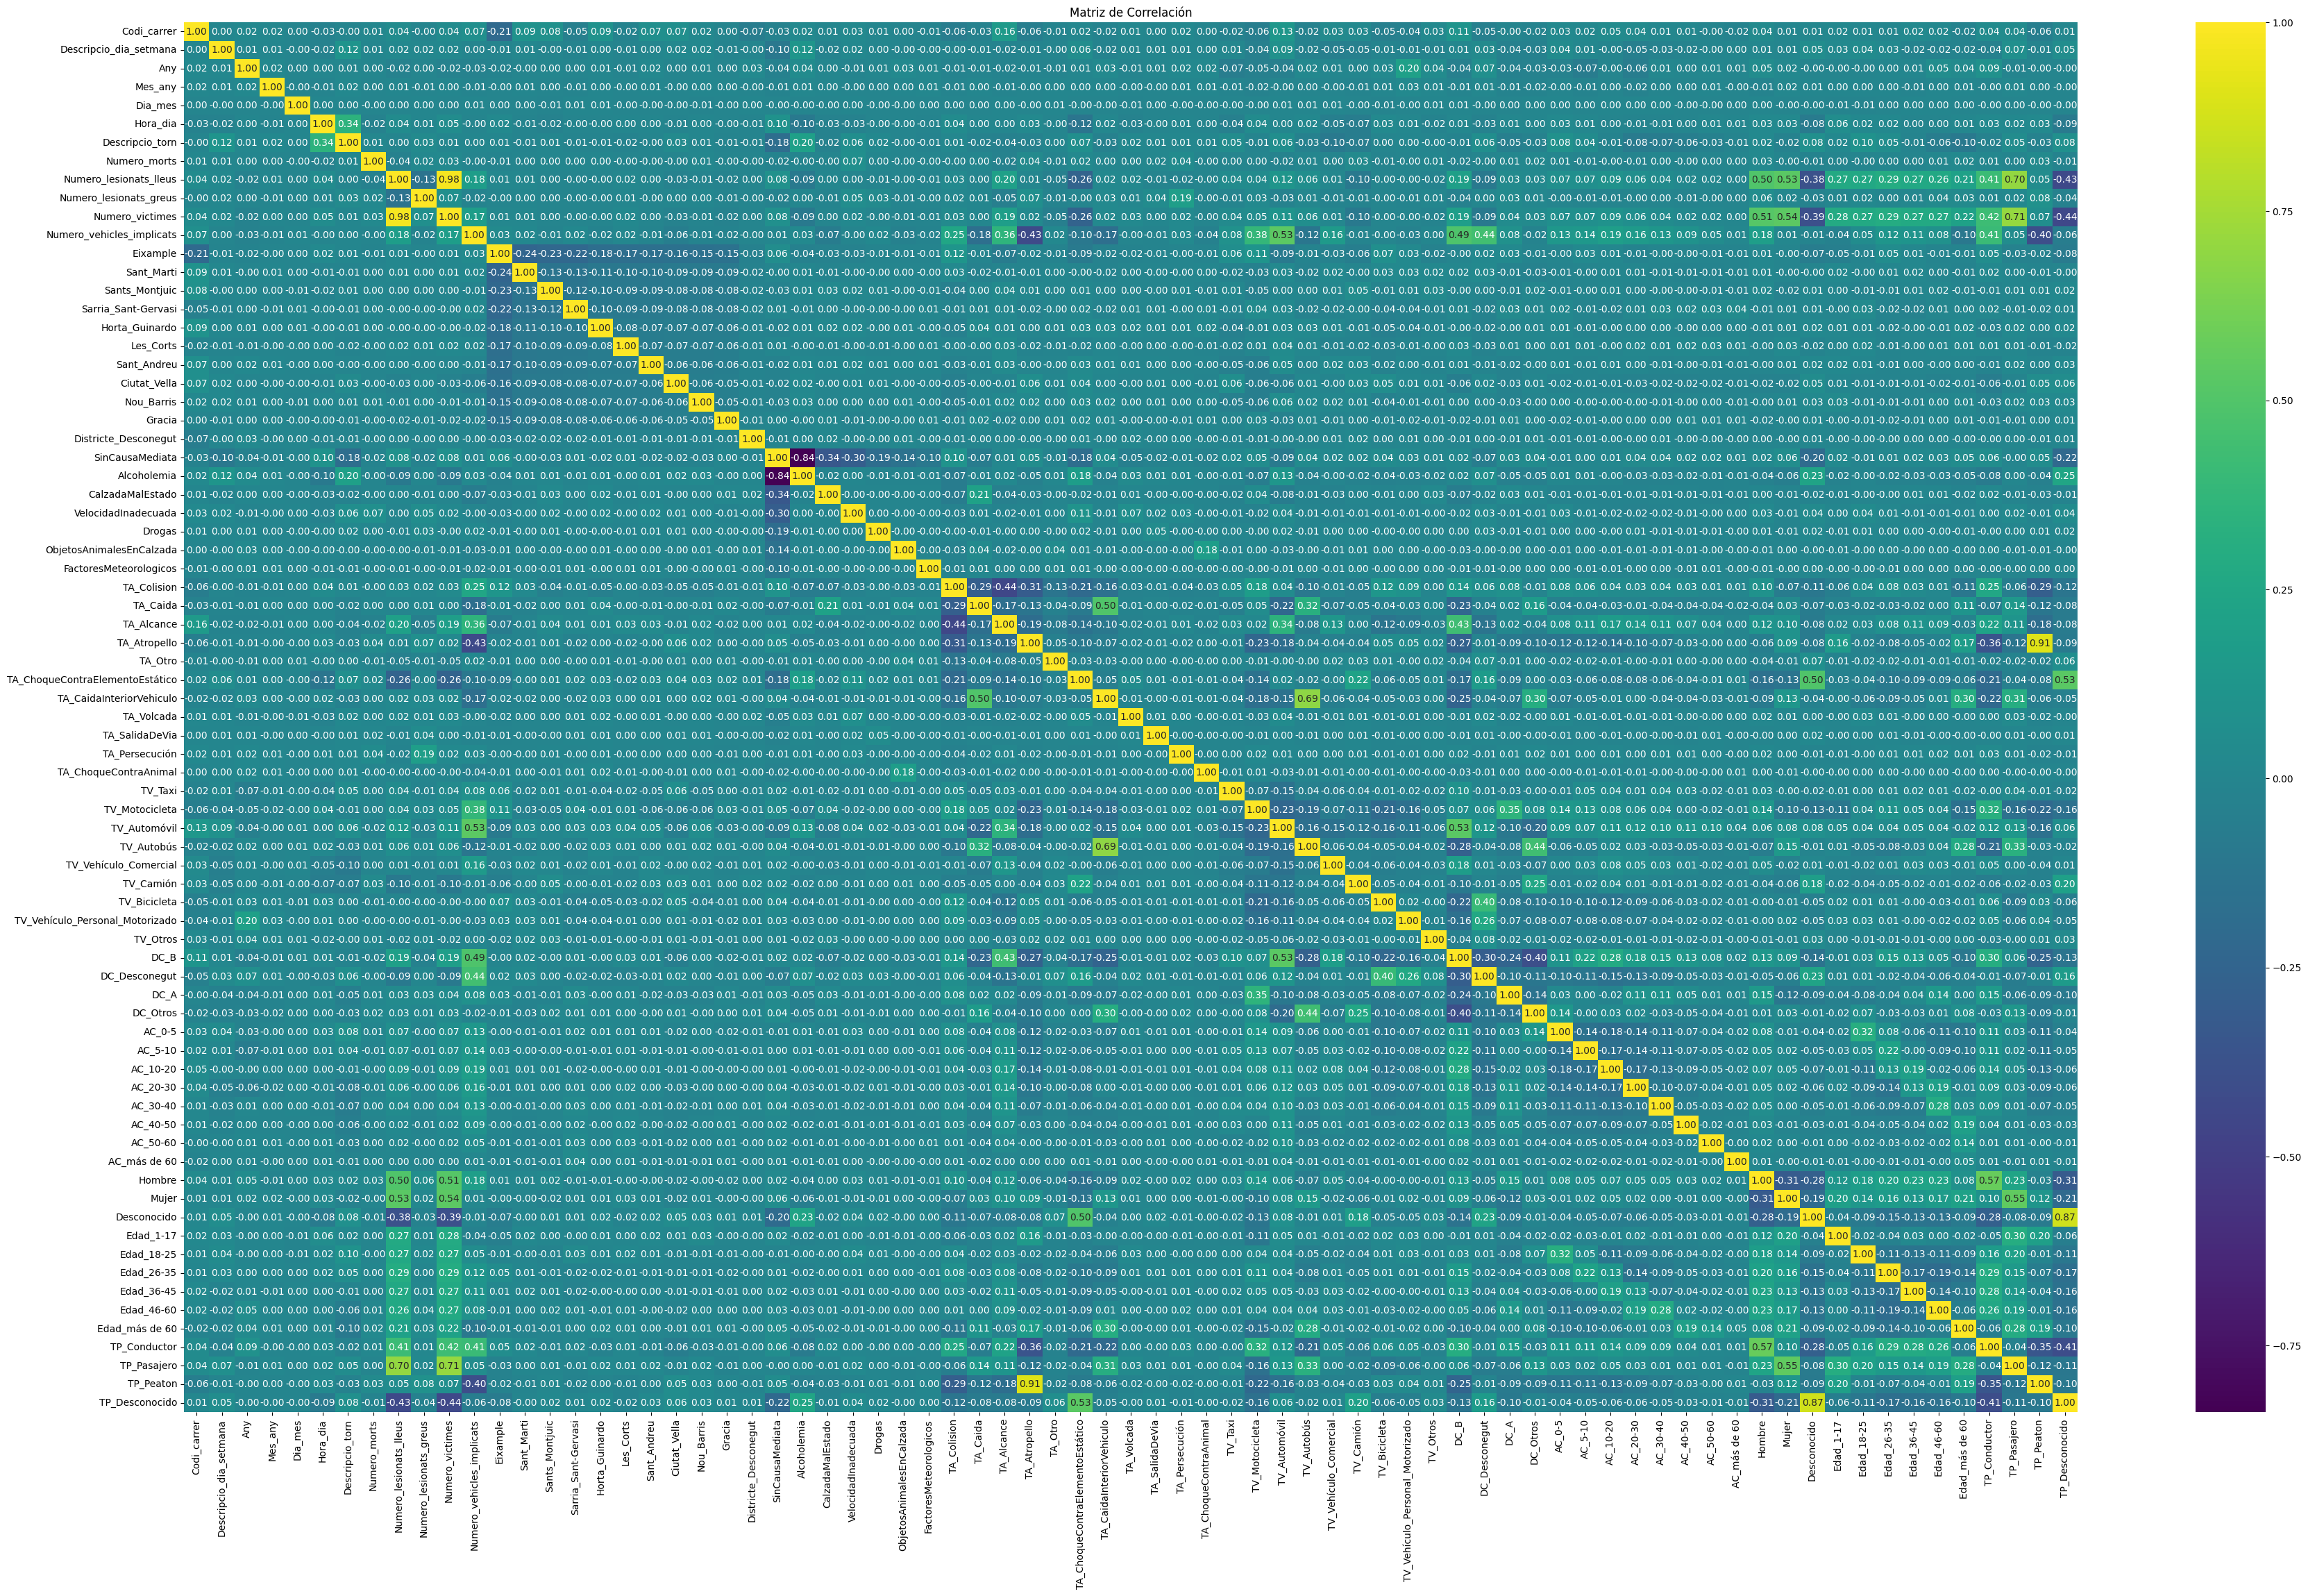

In [5]:
correlation_matrix = df_clustering.corr()
plt.figure(figsize=(44, 26))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Estandarización

In [6]:
# Seleccionar las columnas que deseas estandarizar
columnas_a_estandarizar = ['Descripcio_dia_setmana', 'Any', 'Mes_any', 'Dia_mes', 'Hora_dia', 'Descripcio_torn', 'Codi_carrer']

# Crear un nuevo DataFrame con solo las columnas seleccionadas
df_seleccionado = df[columnas_a_estandarizar]

# Inicializar el objeto StandardScaler
scaler = StandardScaler()

# Estandarizar solo las columnas seleccionadas
df_seleccionado_estandarizado = scaler.fit_transform(df_seleccionado)

# Crear un nuevo DataFrame con las columnas estandarizadas
df_seleccionado_estandarizado = pd.DataFrame(df_seleccionado_estandarizado, columns=columnas_a_estandarizar)

# Concatenar las columnas estandarizadas con las no estandarizadas (si es necesario)
df_clustering_scaled = pd.concat([df_seleccionado_estandarizado, df.drop(columns=columnas_a_estandarizar)], axis=1)
df_clustering_scaled = df_clustering_scaled.drop(['Numero_expedient'], axis = 1)

### PCA

In [7]:
# Inicializar y ajustar el modelo PCA
pca = PCA()
pca.fit(df_clustering_scaled)

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Imprimir la varianza explicada por cada componente
for i, var in enumerate(explained_variance):
    print(f"Varianza explicada por el componente {i + 1}: {var}")

Varianza explicada por el componente 1: 0.1150001763386792
Varianza explicada por el componente 2: 0.07573483160017401
Varianza explicada por el componente 3: 0.07161903952456168
Varianza explicada por el componente 4: 0.05997283576729816
Varianza explicada por el componente 5: 0.056811210603975495
Varianza explicada por el componente 6: 0.055532303694940714
Varianza explicada por el componente 7: 0.05519607256154656
Varianza explicada por el componente 8: 0.05432205254127705
Varianza explicada por el componente 9: 0.045169228872851054
Varianza explicada por el componente 10: 0.0379657498143272
Varianza explicada por el componente 11: 0.03411911477784041
Varianza explicada por el componente 12: 0.029156437746082255
Varianza explicada por el componente 13: 0.023601154736772493
Varianza explicada por el componente 14: 0.022626231069319304
Varianza explicada por el componente 15: 0.020139627174727424
Varianza explicada por el componente 16: 0.01880930808531598
Varianza explicada por el co

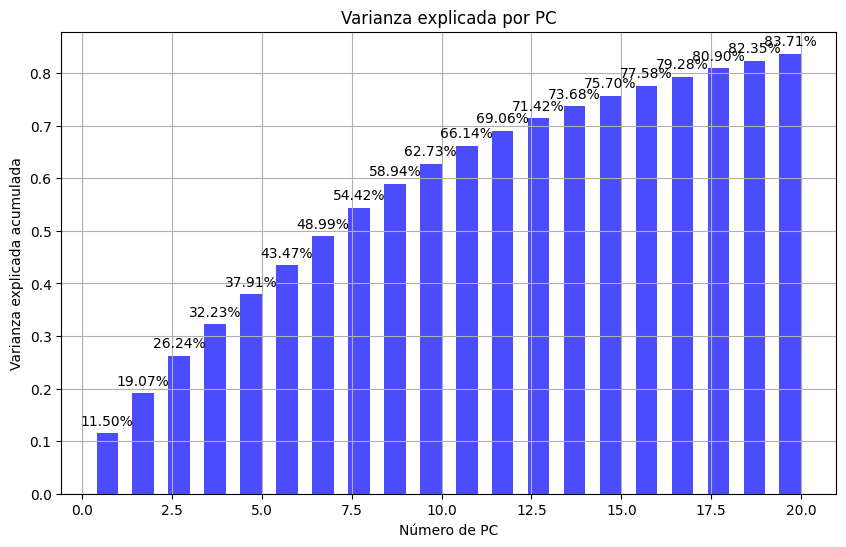

In [8]:
pca = PCA(n_components=20)
pca.fit_transform(df_clustering_scaled)

varianza_explicada_acumulada = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
bar_width = 0.6
plt.bar(np.arange(1, len(varianza_explicada_acumulada) + 1) - bar_width / 2, varianza_explicada_acumulada, alpha=0.7, align='center', width=bar_width, color='blue', label='Varianza Explicada Acumulada')

for i, v in enumerate(varianza_explicada_acumulada):
    plt.text(i + 1 - bar_width / 2, v + 0.01, f'{v*100:.2f}%', ha='center', va='bottom')

plt.xlabel('Número de PC')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por PC')
plt.grid(True)
plt.show()

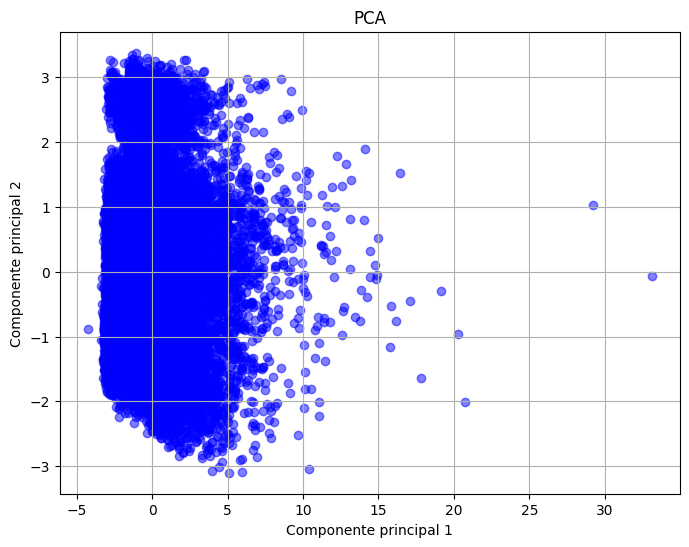

In [9]:
# Inicializar y ajustar el modelo PCA
pca = PCA(n_components=17)
principal_components = pca.fit_transform(df_clustering_scaled)

# Obtener las coordenadas de las dos primeras componentes principales
componente_principal_1 = principal_components[:, 0]
componente_principal_2 = principal_components[:, 1]

# Scatter plot del primer componente principal
plt.figure(figsize=(8, 6))
plt.scatter(componente_principal_1, componente_principal_2, c='blue', alpha=0.5)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA')
plt.grid(True)
plt.show()

### Elbow Test

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

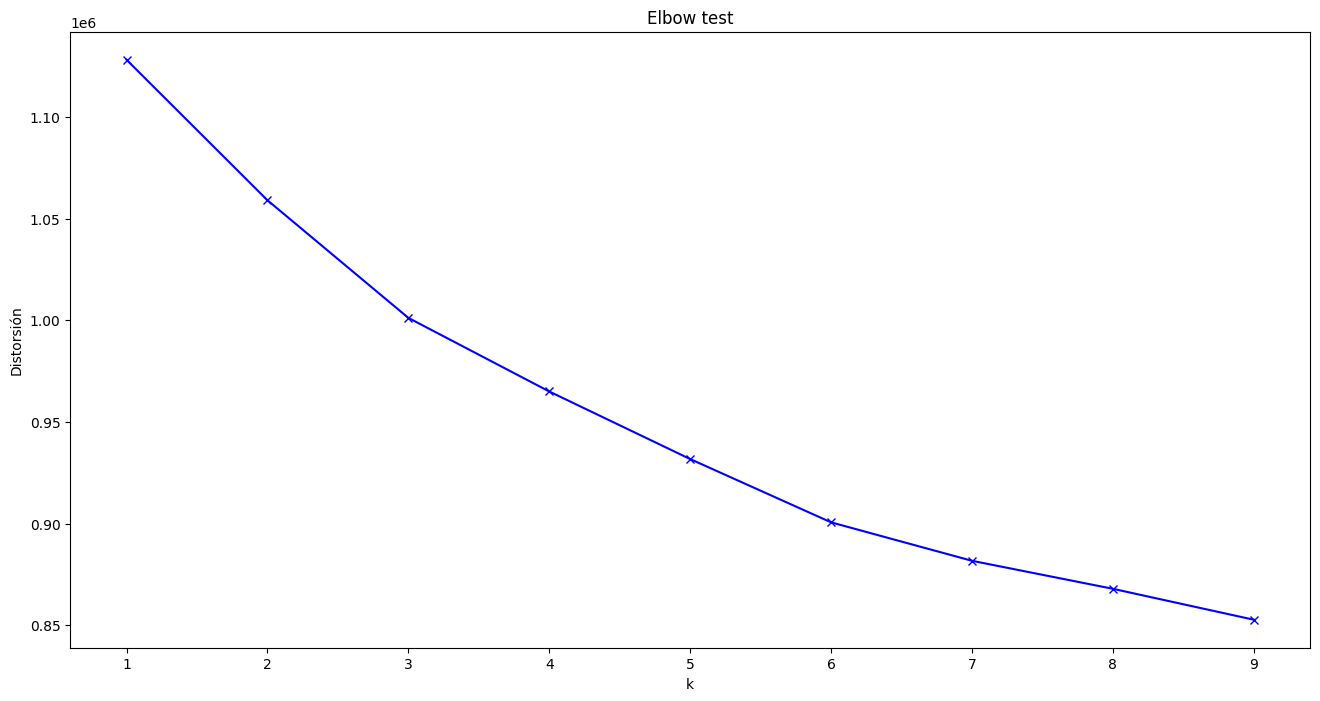

In [10]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_clustering_scaled)
    distortions.append(kmeanModel.inertia_)

# Graficamos las distorsiones
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Elbow test')
plt.show()

### KMeans

In [11]:
# Realizar clustering con KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_clustering_scaled)

# Inicializar y ajustar el modelo PCA
pca = PCA(n_components=17)
principal_components = pca.fit_transform(df_clustering_scaled)

# Obtener las coordenadas de las dos primeras componentes principales
componente_principal_1 = principal_components[:, 0]
componente_principal_2 = principal_components[:, 1]
componente_principal_3 = principal_components[:, 2]

# Obtener los centroides de los clusters
centroides = kmeans.cluster_centers_
centroides_proyectados = pca.transform(centroides)

df_clustering_scaled['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### Plots

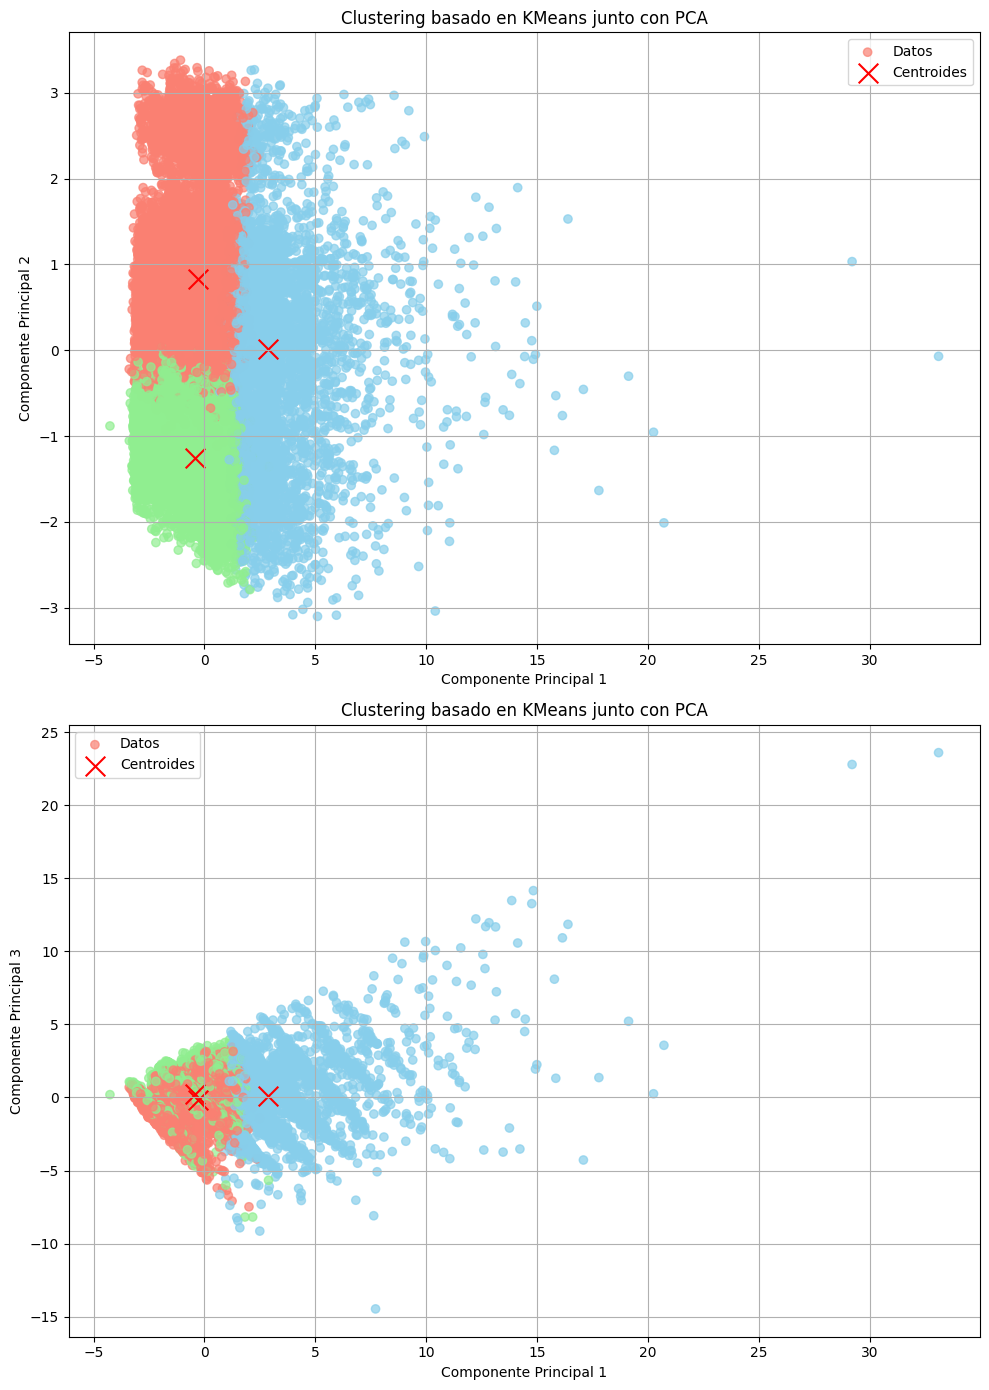

<ipython-input-12-b5fd4d15ae4c>:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(componente_principal_1, componente_principal_2, componente_principal_3, c=[colors[i] for i in clusters], cmap='viridis', alpha=0.7, label='Datos')


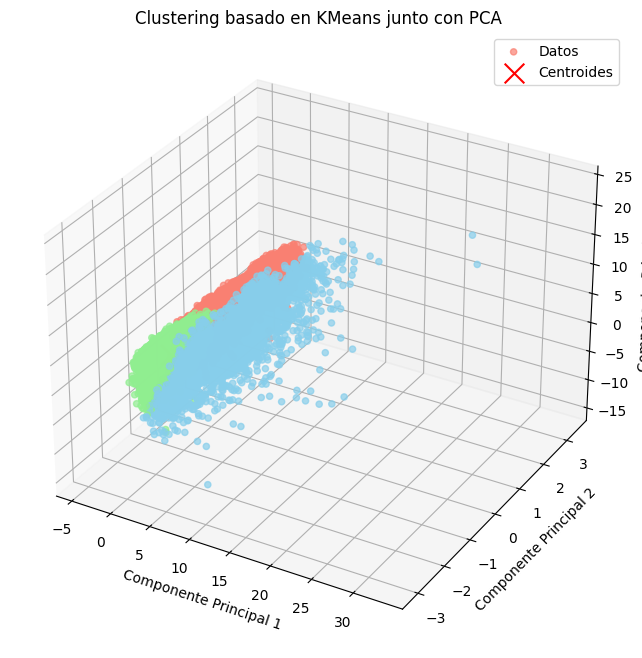

In [12]:
# Colores para los clusters
colors = ['skyblue', 'salmon', 'lightgreen']

# Crear una figura con subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 14))

# Scatter plot de las dos primeras componentes principales con colores para los clusters
axs[0].scatter(componente_principal_1, componente_principal_2, c=[colors[i] for i in clusters], alpha=0.7, label='Datos')
axs[0].scatter(centroides_proyectados[:, 0], centroides_proyectados[:, 1], marker='x', c='red', s=200, label='Centroides')
axs[0].set_xlabel('Componente Principal 1')
axs[0].set_ylabel('Componente Principal 2')
axs[0].set_title('Clustering basado en KMeans junto con PCA')
axs[0].legend()
axs[0].grid(True)

# Scatter plot de las primeras y tercera componentes principales con colores para los clusters
axs[1].scatter(componente_principal_1, componente_principal_3, c=[colors[i] for i in clusters], alpha=0.7, label='Datos')
axs[1].scatter(centroides_proyectados[:, 0], centroides_proyectados[:, 2], marker='x', c='red', s=200, label='Centroides')
axs[1].set_xlabel('Componente Principal 1')
axs[1].set_ylabel('Componente Principal 3')
axs[1].set_title('Clustering basado en KMeans junto con PCA')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Crear la figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D de las tres primeras componentes principales con colores para los clusters
ax.scatter(componente_principal_1, componente_principal_2, componente_principal_3, c=[colors[i] for i in clusters], cmap='viridis', alpha=0.7, label='Datos')
ax.scatter(centroides_proyectados[:, 0], centroides_proyectados[:, 1], centroides_proyectados[:, 2], marker='x', c='red', s=200, label='Centroides')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clustering basado en KMeans junto con PCA')
ax.legend()
plt.show()


In [13]:
# Define los colores personalizados para cada cluster
color_dict = {cluster: color for cluster, color in zip(range(len(colors)), colors)}

# Crea una lista de colores para cada punto en base a los clusters
cluster_colors = [color_dict[cluster] for cluster in clusters]

# Crea una lista de nombres de cluster para la leyenda
cluster_names = [f'Cluster {cluster}' for cluster in set(clusters)]

# Crea el gráfico 3D interactivo
fig = go.Figure()

# Scatter plot en 3D de las tres primeras componentes principales con colores para los clusters
for cluster, name in zip(set(clusters), cluster_names):
    fig.add_trace(go.Scatter3d(
        x=componente_principal_1[clusters == cluster],
        y=componente_principal_2[clusters == cluster],
        z=componente_principal_3[clusters == cluster],
        mode='markers',
        marker=dict(
            size=5,
            color=color_dict[cluster],  # Usa los colores personalizados
            opacity=0.7
        ),
        name=name  # Nombre del cluster en la leyenda
    ))

# Agrega los centroides como marcadores rojos 'x'
fig.add_trace(go.Scatter3d(
    x=centroides_proyectados[:, 0],
    y=centroides_proyectados[:, 1],
    z=centroides_proyectados[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x'
    ),
    name='Centroides'
))

# Configura el diseño del gráfico
fig.update_layout(
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3',
    ),
    title='Clustering basado en KMeans junto con PCA',
    showlegend=True
)

# Muestra el gráfico interactivo
fig.show()


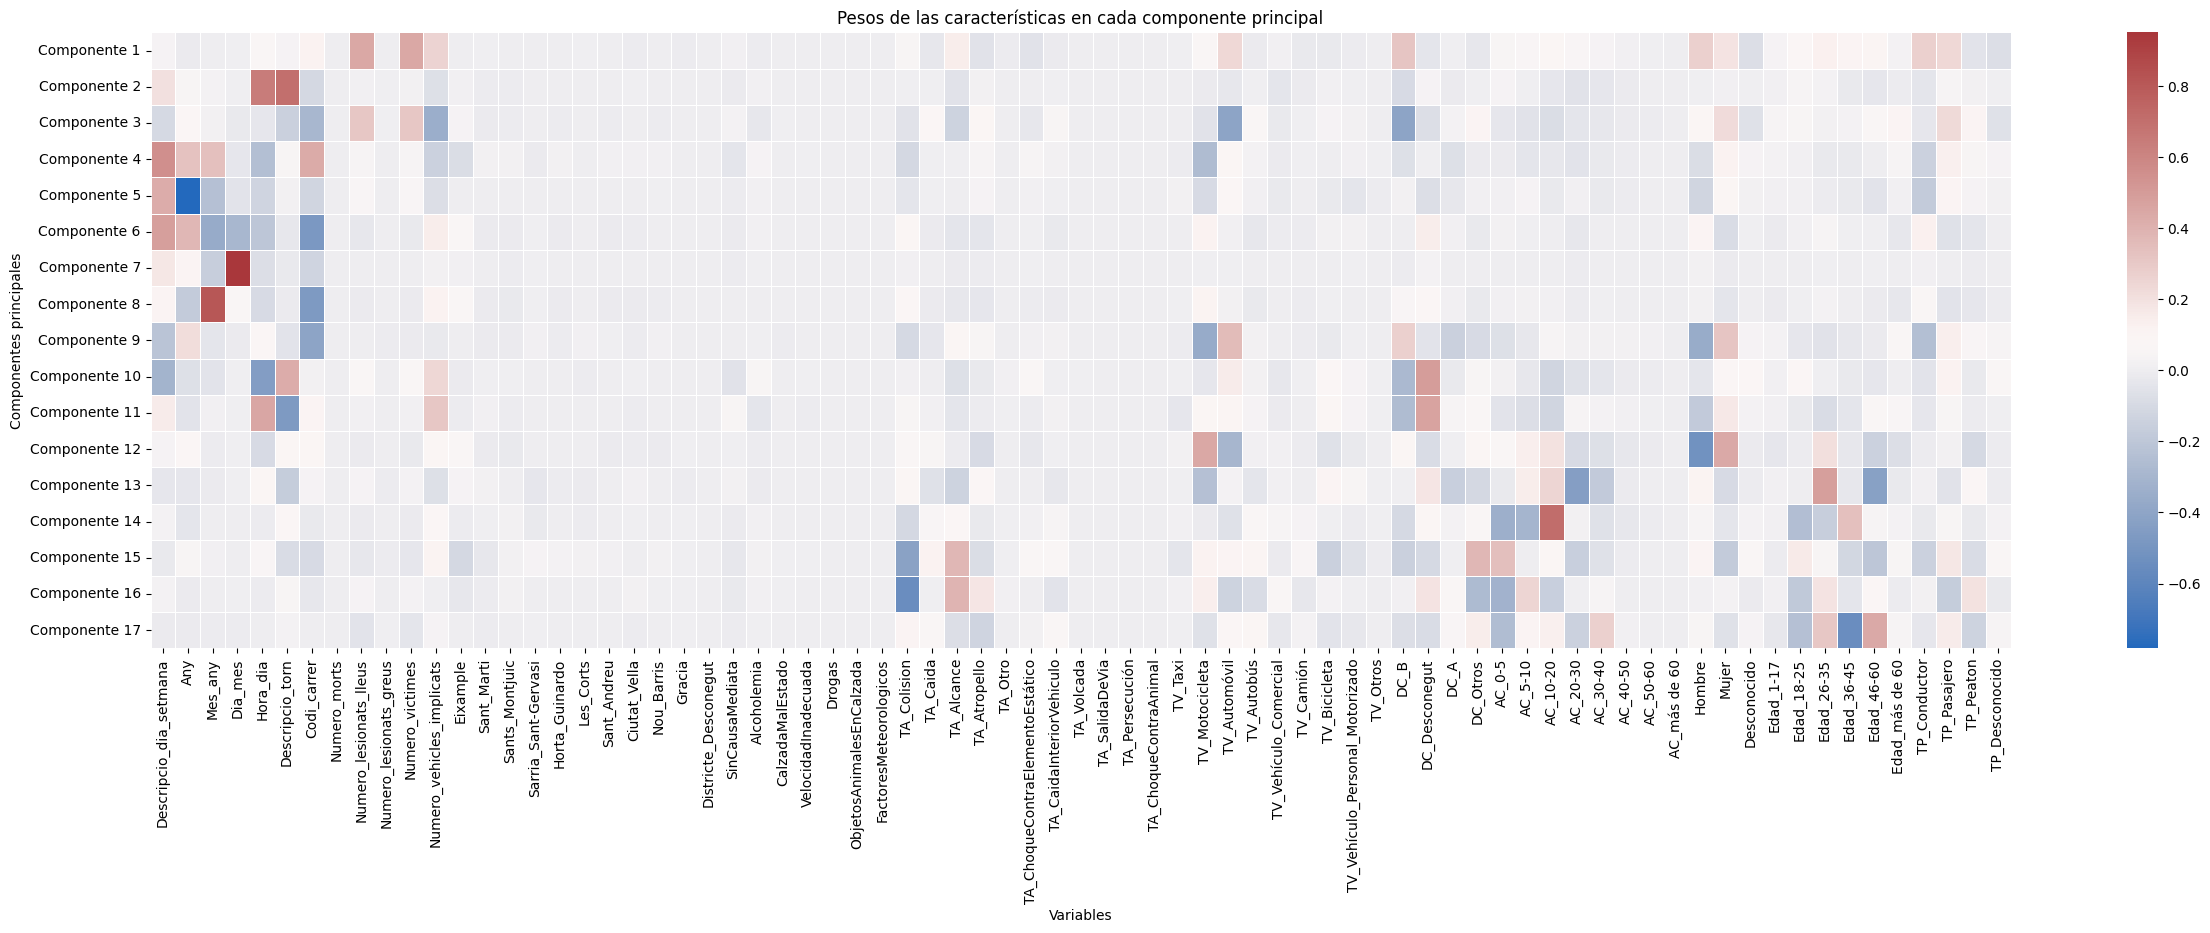

In [14]:
# Obtener los pesos de las características en cada componente principal
pesos_componentes = pca.components_

# Crear el heatmap
plt.figure(figsize=(30, 8))
sns.heatmap(pesos_componentes, cmap='vlag', annot=False, fmt=".2f", xticklabels=df_clustering_scaled.drop(['Cluster'], axis = 1).columns, yticklabels=[f'Componente {i+1}' for i in range(len(pesos_componentes))], linewidths=0.5)
plt.title('Pesos de las características en cada componente principal')
plt.xlabel('Variables')
plt.ylabel('Componentes principales')
#plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


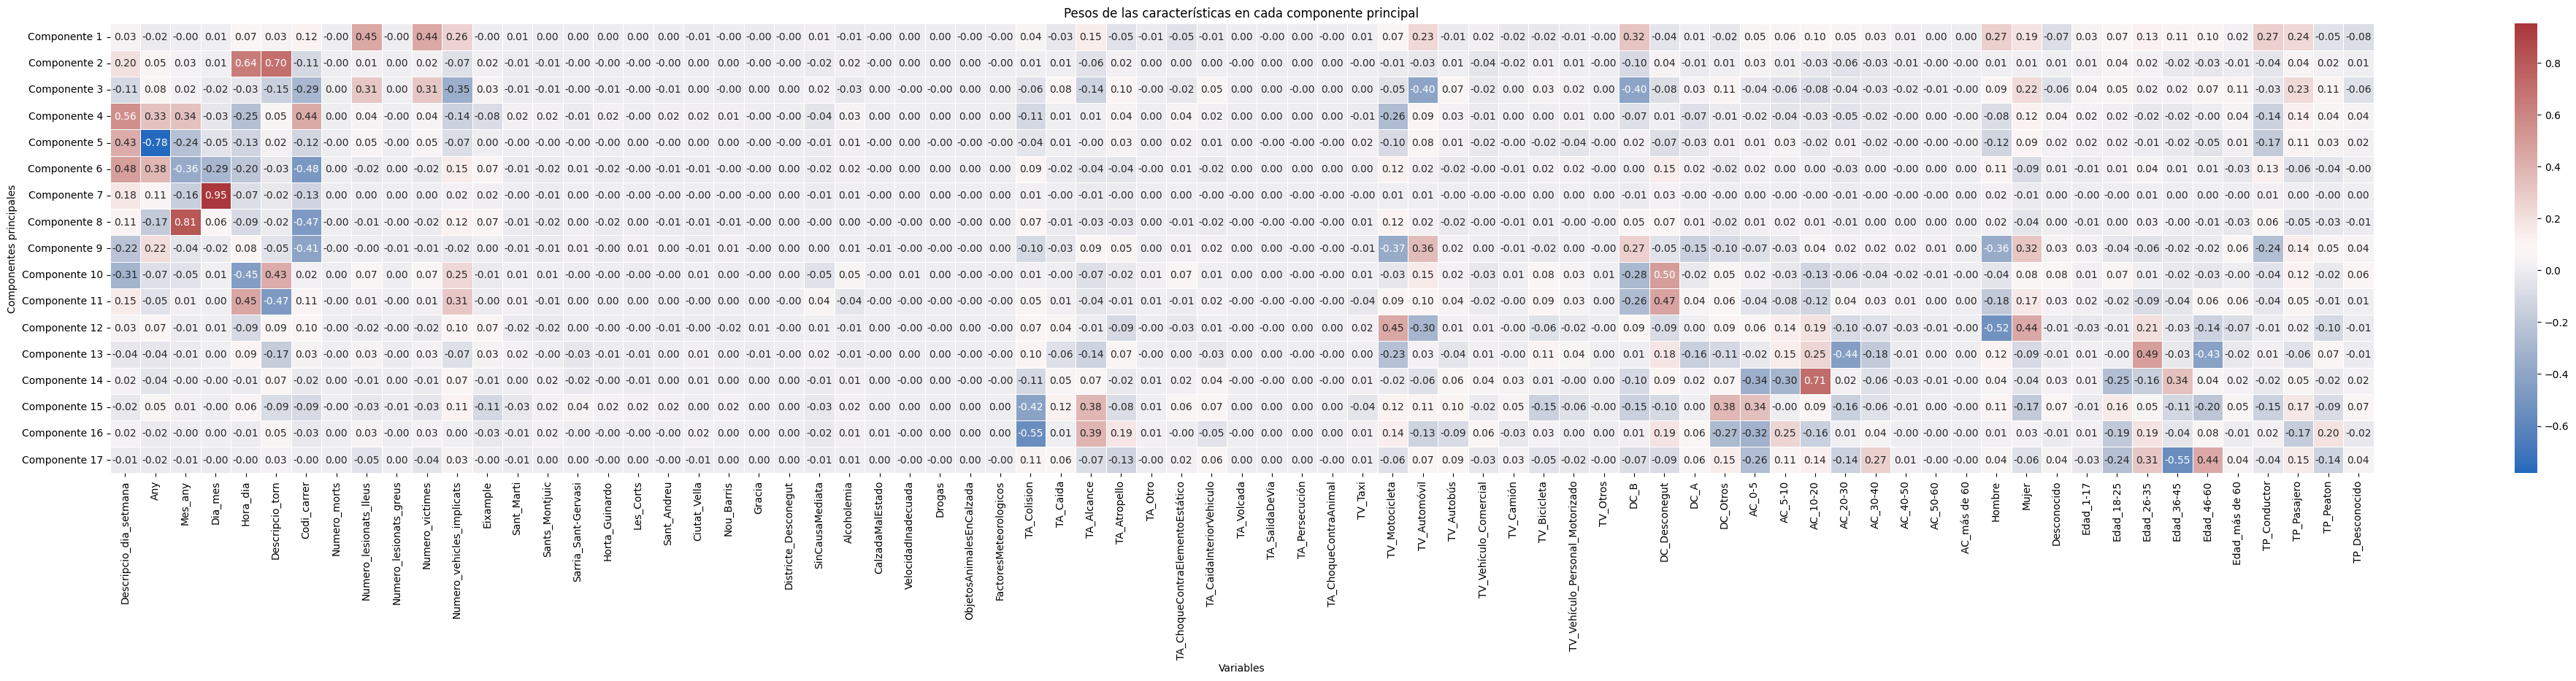

In [15]:
# Heatmap más detallado

# Obtener los pesos de las características en cada componente principal
pesos_componentes = pca.components_

# Crear el heatmap
plt.figure(figsize=(50, 8))
sns.heatmap(pesos_componentes, cmap='vlag', annot=True, fmt=".2f", xticklabels=df_clustering_scaled.drop(['Cluster'], axis = 1).columns, yticklabels=[f'Componente {i+1}' for i in range(len(pesos_componentes))], linewidths=0.5)
plt.title('Pesos de las características en cada componente principal')
plt.xlabel('Variables')
plt.ylabel('Componentes principales')
#plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

In [16]:
# Crear un DataFrame con los pesos de las características en cada componente principal
pesos_df = pd.DataFrame(pesos_componentes, columns=df_clustering_scaled.drop(['Cluster'], axis = 1).columns)

# Añadir una columna para representar los componentes principales
pesos_df['Componente Principal'] = [f'Componente {i+1}' for i in range(len(pesos_componentes))]

# Reorganizar las columnas para que 'Componente Principal' esté al principio
column_order = ['Componente Principal'] + list(df_clustering_scaled.drop(['Cluster'], axis = 1).columns)
pesos_df = pesos_df[column_order]

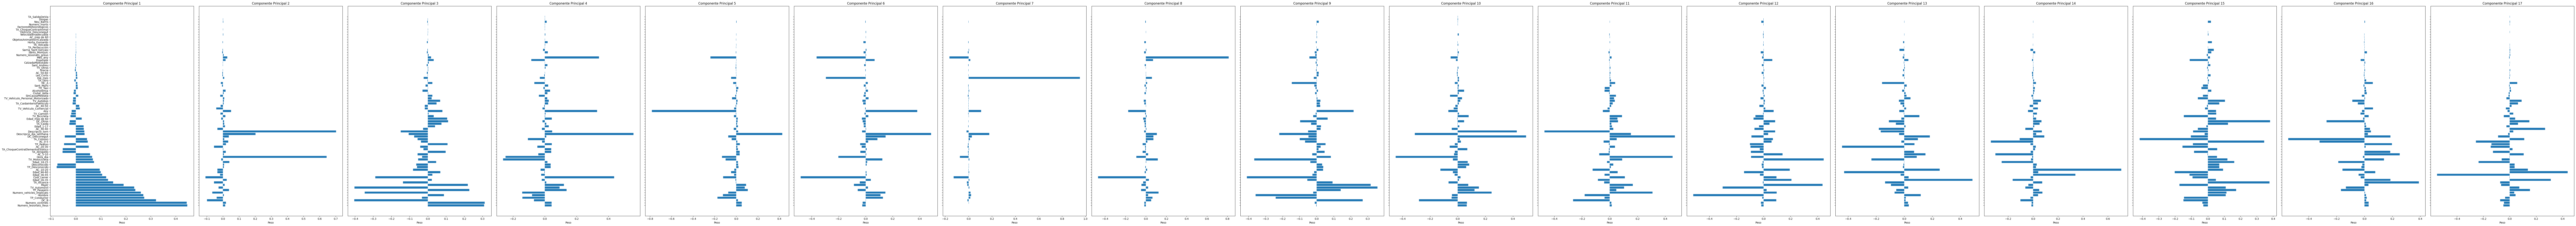

In [17]:
# Obtener los pesos de las características en cada componente principal
pesos_componentes = pca.components_

# Crear el gráfico de barras para cada componente principal
num_componentes = len(pesos_componentes)
num_caracteristicas = len(df_clustering_scaled.columns)

# Crear una figura con subgráficos para cada componente principal
fig, axs = plt.subplots(1, num_componentes, figsize=(8*num_componentes, 12), sharey=True)

for i in range(num_componentes):
    # Obtener los pesos absolutos de las características en el componente principal
    pesos_absolutos = np.abs(pesos_componentes[i])
    # Ordenar las características por sus pesos absolutos
    indices_ordenados = pesos_absolutos.argsort()[::-1]
    # Obtener las características y sus pesos ordenados
    caracteristicas_ordenadas = df_clustering_scaled.columns[indices_ordenados]
    pesos_ordenados = pesos_componentes[i][indices_ordenados]
    # Crear el gráfico de barras para el componente principal
    axs[i].barh(caracteristicas_ordenadas, pesos_ordenados)
    axs[i].set_title(f'Componente Principal {i+1}')
    axs[i].set_xlabel('Peso')

plt.tight_layout()
plt.show()

### Profiling

Análisis de los clústers

In [18]:
# Colores para los clusters
colors = ['lightgreen', 'skyblue', 'salmon']

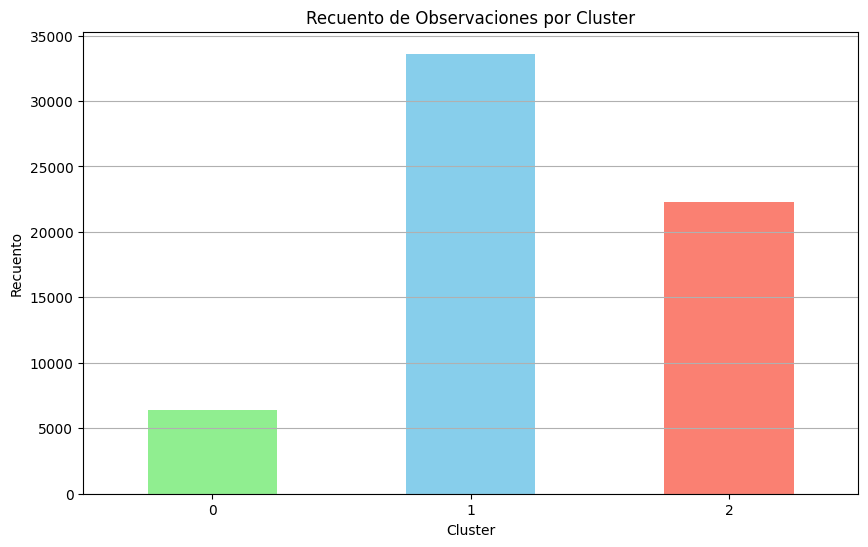

In [19]:
# Recuento de valores en la columna 'Cluster'
recuento_clusters = df_clustering_scaled['Cluster'].value_counts()

# Ordenar el recuento de clusters según el orden específico (0, 1, 2)
recuento_clusters = recuento_clusters.reindex([0, 1, 2])

# Crear el gráfico de barras con colores personalizados y ordenados
plt.figure(figsize=(10, 6))
recuento_clusters.plot(kind='bar', color=colors)
plt.xlabel('Cluster')
plt.ylabel('Recuento')
plt.title('Recuento de Observaciones por Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [20]:
recuento_clusters

Cluster
0     6425
1    33615
2    22268
Name: count, dtype: int64

##### Edad

<ipython-input-21-a21e022e3f14>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



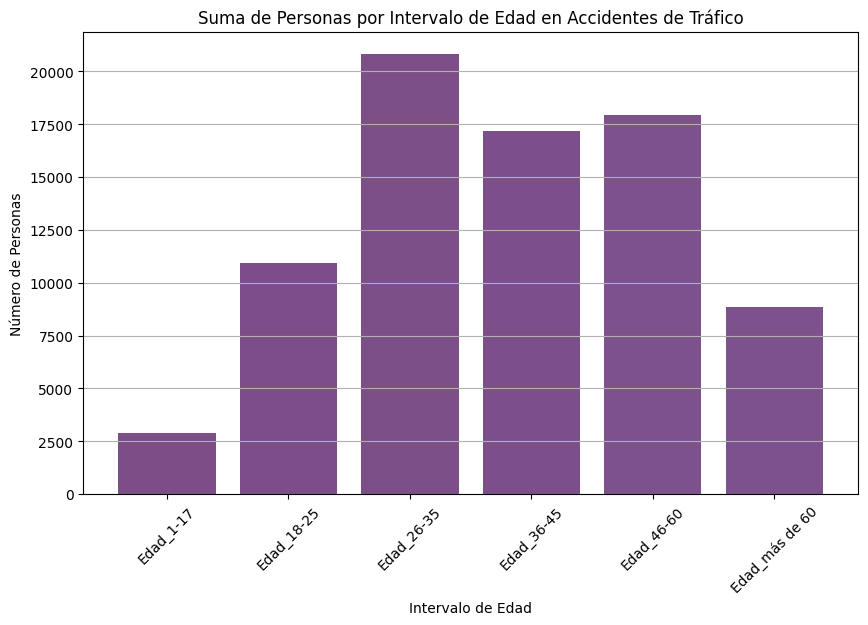

In [21]:
# Seleccionar las columnas especificadas
columnas_edades = ['Edad_1-17', 'Edad_18-25', 'Edad_26-35', 'Edad_36-45', 'Edad_46-60', 'Edad_más de 60']

# Calcular la suma de las columnas seleccionadas
suma_edades = df_clustering_scaled[columnas_edades].sum()

# Colormap deseado
colormap = 'viridis'

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(suma_edades.index, suma_edades, color=plt.cm.get_cmap(colormap)(range(len(suma_edades))), alpha=0.7)
plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por Intervalo de Edad en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()


In [22]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_edades_0 = df_cluster_0[columnas_edades].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_edades_1 = df_cluster_1[columnas_edades].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_edades_2 = df_cluster_2[columnas_edades].sum()

#df_cluster_3 = df_clustering_scaled.query('Cluster == 3')
#suma_edades_3 = df_cluster_3[columnas_edades].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_edad = df_clustering_scaled[columnas_edades].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_edades_0)
total_cluster_1 = sum(suma_edades_1)
total_cluster_2 = sum(suma_edades_2)


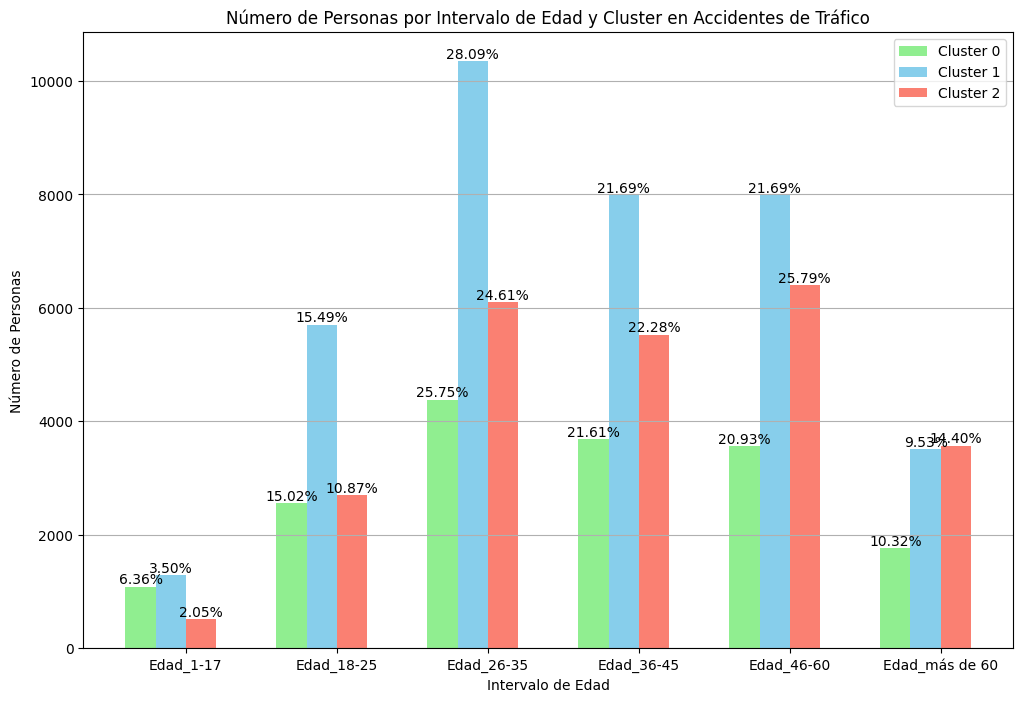

In [23]:
# Crear el gráfico de barras con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
width = 0.2
x = range(len(columnas_edades))
for i, (suma_edades, total_cluster, color) in enumerate(zip([suma_edades_0, suma_edades_1, suma_edades_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.bar([pos + i * width for pos in x], suma_edades, width=width, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Personas')
plt.title('Número de Personas por Intervalo de Edad y Cluster en Accidentes de Tráfico')
plt.xticks([pos + 1.5 * width for pos in x], columnas_edades, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(x):
    for j, (suma_edades, total_cluster) in enumerate(zip([suma_edades_0, suma_edades_1, suma_edades_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_edades[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(pos + j * width, suma_edades[i] + 0.5, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='y')
plt.show()

###### .

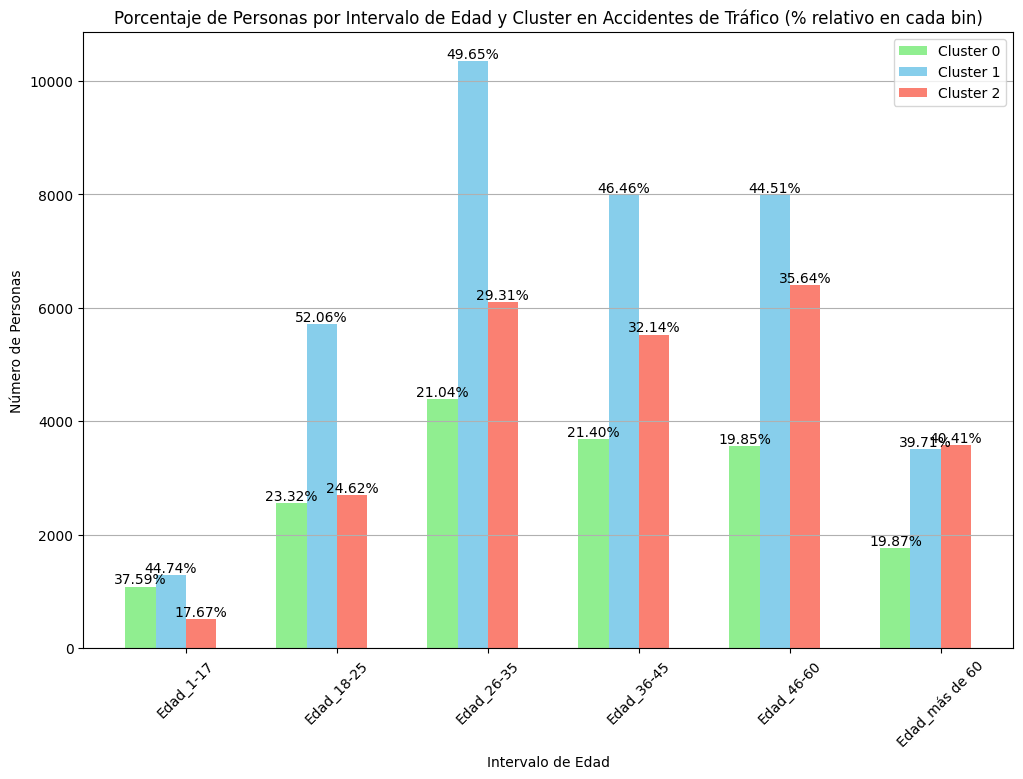

In [24]:
# Crear el gráfico de barras con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
width = 0.2
x = range(len(columnas_edades))
for i, (suma_edades, color) in enumerate(zip([suma_edades_0, suma_edades_1, suma_edades_2], colors)):
    plt.bar([pos + i * width for pos in x], suma_edades, width=width, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Personas')
plt.title('Porcentaje de Personas por Intervalo de Edad y Cluster en Accidentes de Tráfico (% relativo en cada bin)')
plt.xticks([pos + 1.5 * width for pos in x], columnas_edades, rotation=45)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(x):
    total = suma_edades_0[i] + suma_edades_1[i] + suma_edades_2[i]  # Calcular el total para cada intervalo de edad
    for j, suma_edad in enumerate([suma_edades_0, suma_edades_1, suma_edades_2]):
        percentage = (suma_edad[i] / total) * 100  # Calcular el porcentaje
        plt.text(pos + j * width, suma_edad[i] + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()


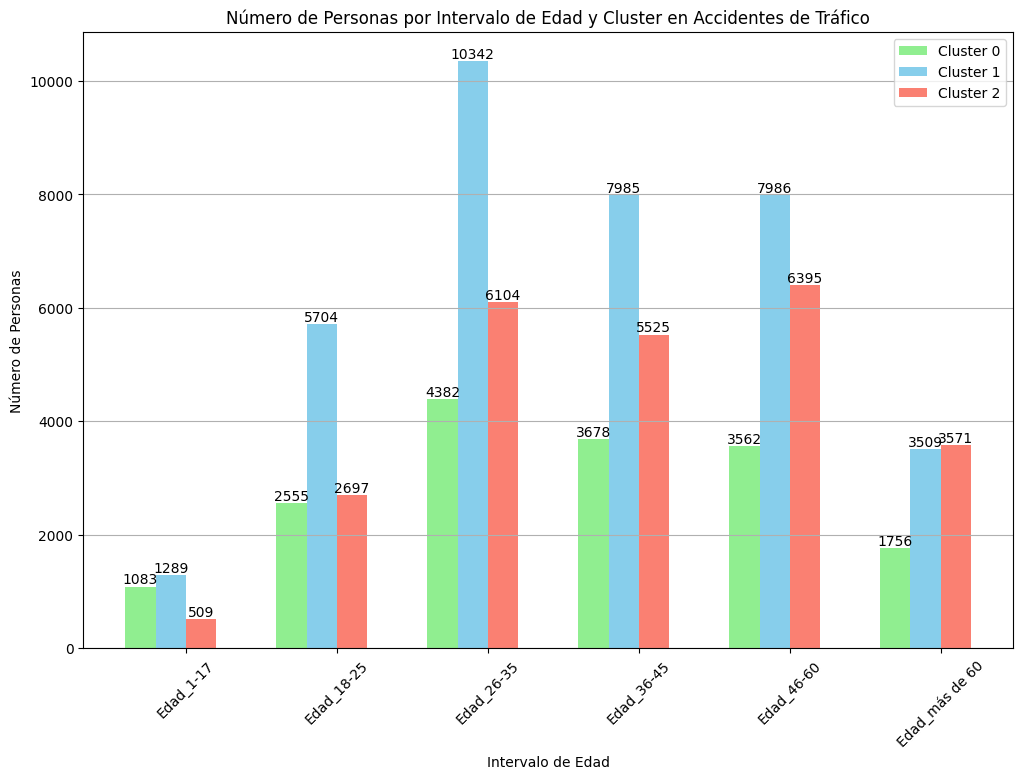

In [25]:
# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_edad = df_clustering_scaled[columnas_edades].sum()

# Crear el gráfico de barras con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
width = 0.2
x = range(len(columnas_edades))
for i, (suma_edades, color) in enumerate(zip([suma_edades_0, suma_edades_1, suma_edades_2], colors)):
    plt.bar([pos + i * width for pos in x], suma_edades, width=width, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Personas')
plt.title('Número de Personas por Intervalo de Edad y Cluster en Accidentes de Tráfico')
plt.xticks([pos + 1.5 * width for pos in x], columnas_edades, rotation=45)
plt.legend()

# Mostrar valores encima de las barras
for i, pos in enumerate(x):
    for j, suma_edad in enumerate([suma_edades_0, suma_edades_1, suma_edades_2]):
        plt.text(pos + (j + 0) * width, suma_edad[i] + 0.5, f'{suma_edad[i]}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

##### Causa

<ipython-input-26-91c8215f6fd6>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



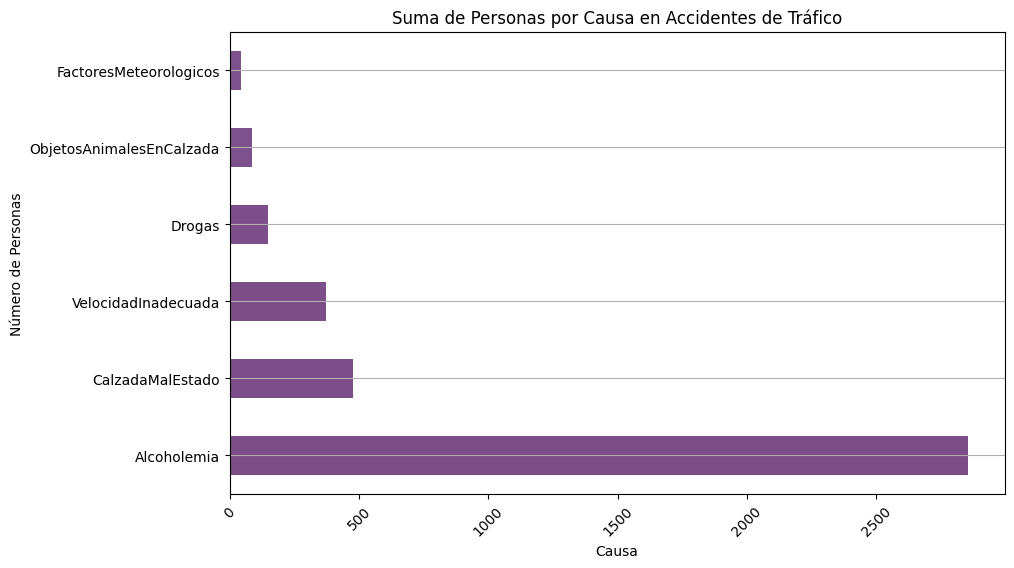

In [26]:
# Seleccionar las columnas especificadas
columnas_causa = ['Alcoholemia', 'CalzadaMalEstado', 'VelocidadInadecuada', 'Drogas', 'ObjetosAnimalesEnCalzada', 'FactoresMeteorologicos']

# Calcular la suma de las columnas seleccionadas
suma_causa = df_clustering_scaled[columnas_causa].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_causa.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_causa))), alpha=0.7)
plt.xlabel('Causa')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por Causa en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [27]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_causa_0 = df_cluster_0[columnas_causa].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_causa_1 = df_cluster_1[columnas_causa].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_causa_2 = df_cluster_2[columnas_causa].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_causa = df_clustering_scaled[columnas_causa].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_causa_0)
total_cluster_1 = sum(suma_causa_1)
total_cluster_2 = sum(suma_causa_2)


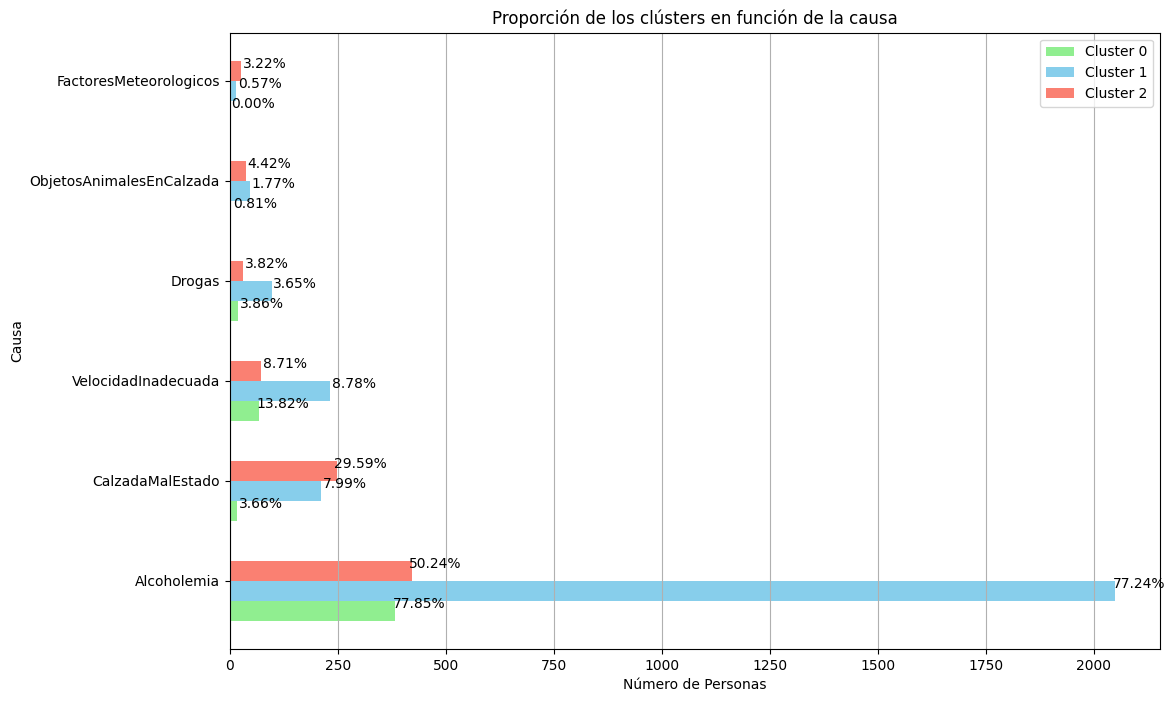

In [28]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_causa))
for i, (suma_causa, total_cluster, color) in enumerate(zip([suma_causa_0, suma_causa_1, suma_causa_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_causa, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Causa')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función de la causa')
plt.yticks([pos + 1.5 * height for pos in y], columnas_causa, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_causa, total_cluster) in enumerate(zip([suma_causa_0, suma_causa_1, suma_causa_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_causa[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_causa[i] + 55, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Lesión

<ipython-input-29-75104d4a2e4a>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



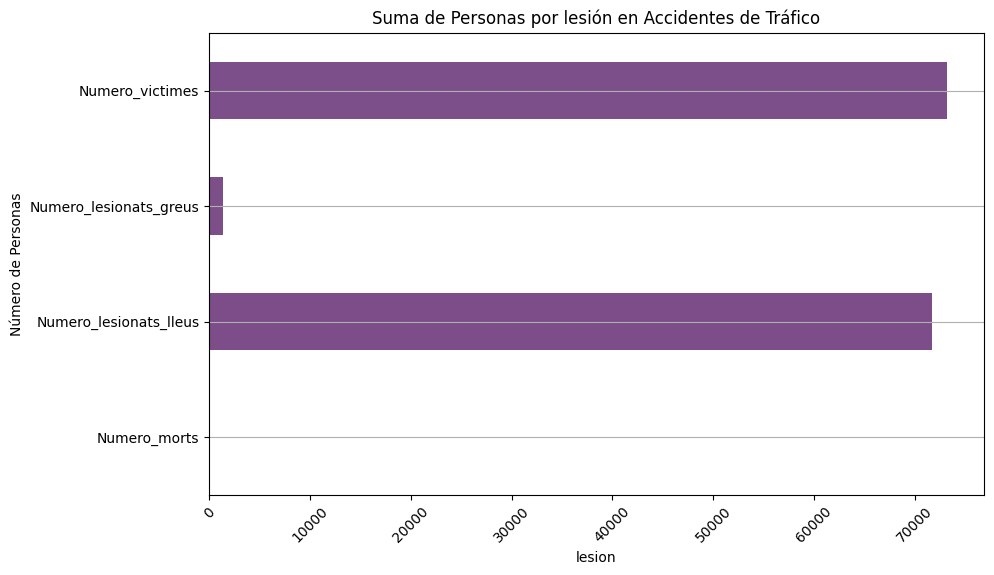

In [29]:
# Seleccionar las columnas especificadas
columnas_lesion = ['Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes']

# Calcular la suma de las columnas seleccionadas
suma_lesion = df_clustering_scaled[columnas_lesion].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_lesion.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_lesion))), alpha=0.7)
plt.xlabel('lesion')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [30]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_lesion_0 = df_cluster_0[columnas_lesion].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_lesion_1 = df_cluster_1[columnas_lesion].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_lesion_2 = df_cluster_2[columnas_lesion].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_lesion = df_clustering_scaled[columnas_lesion].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_lesion_0)
total_cluster_1 = sum(suma_lesion_1)
total_cluster_2 = sum(suma_lesion_2)


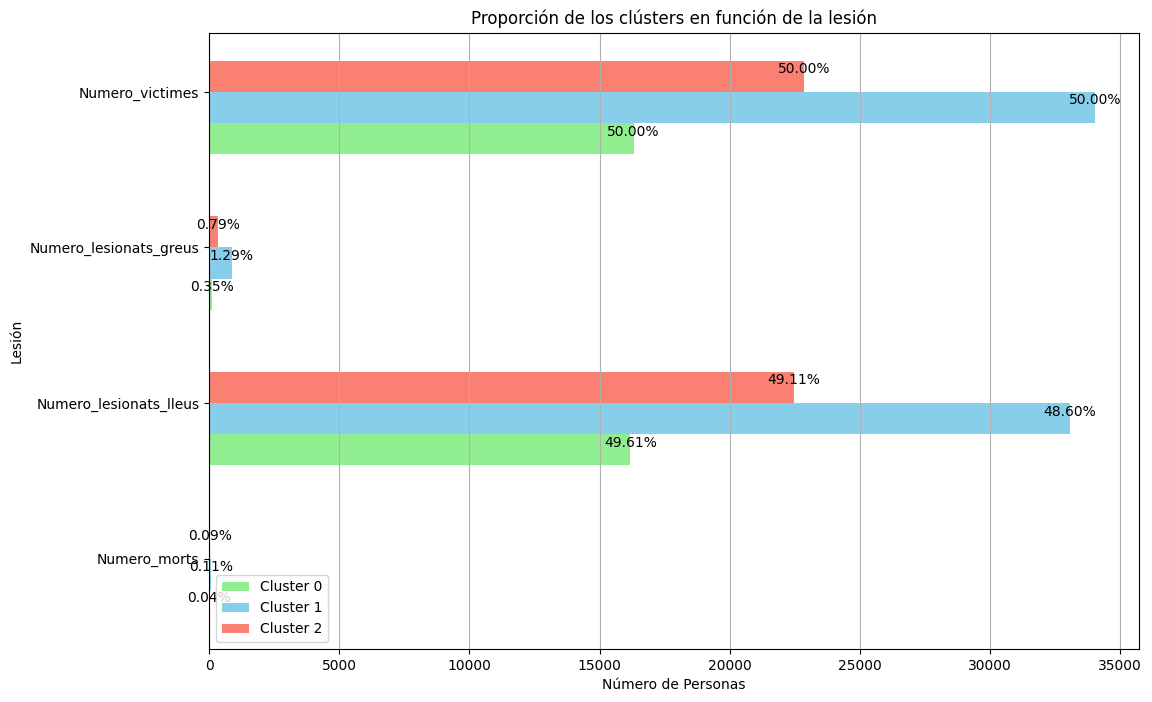

In [31]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_lesion))
for i, (suma_lesion, total_cluster, color) in enumerate(zip([suma_lesion_0, suma_lesion_1, suma_lesion_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_lesion, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función de la lesión')
plt.yticks([pos + 1.5 * height for pos in y], columnas_lesion, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_lesion, total_cluster) in enumerate(zip([suma_lesion_0, suma_lesion_1, suma_lesion_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_lesion[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_lesion[i] + 0.5, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Tipo de accidente

<ipython-input-32-71ad721175ac>:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



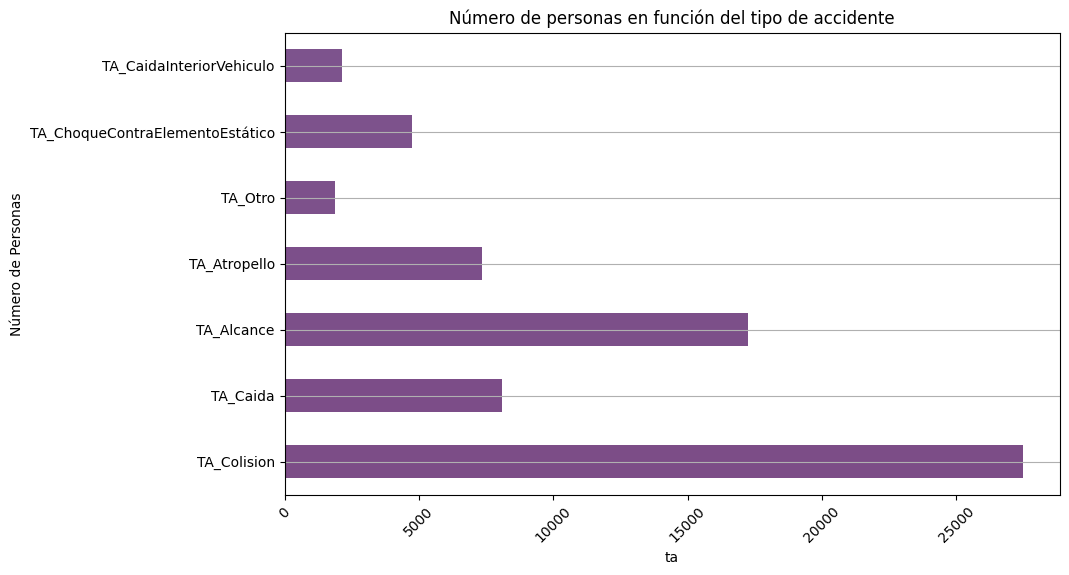

In [32]:
# Seleccionar las columnas especificadas
columnas_ta = ['TA_Colision', 'TA_Caida', 'TA_Alcance',
       'TA_Atropello', 'TA_Otro', 'TA_ChoqueContraElementoEstático',
       'TA_CaidaInteriorVehiculo'#, 'TA_Volcada', 'TA_SalidaDeVia',
      # 'TA_Persecución', 'TA_ChoqueContraAnimal'
       ]

# Calcular la suma de las columnas seleccionadas
suma_ta = df_clustering_scaled[columnas_ta].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_ta.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_ta))), alpha=0.7)
plt.xlabel('ta')
plt.ylabel('Número de Personas')
plt.title('Número de personas en función del tipo de accidente')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [33]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_ta_0 = df_cluster_0[columnas_ta].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_ta_1 = df_cluster_1[columnas_ta].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_ta_2 = df_cluster_2[columnas_ta].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_ta = df_clustering_scaled[columnas_ta].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_ta_0)
total_cluster_1 = sum(suma_ta_1)
total_cluster_2 = sum(suma_ta_2)


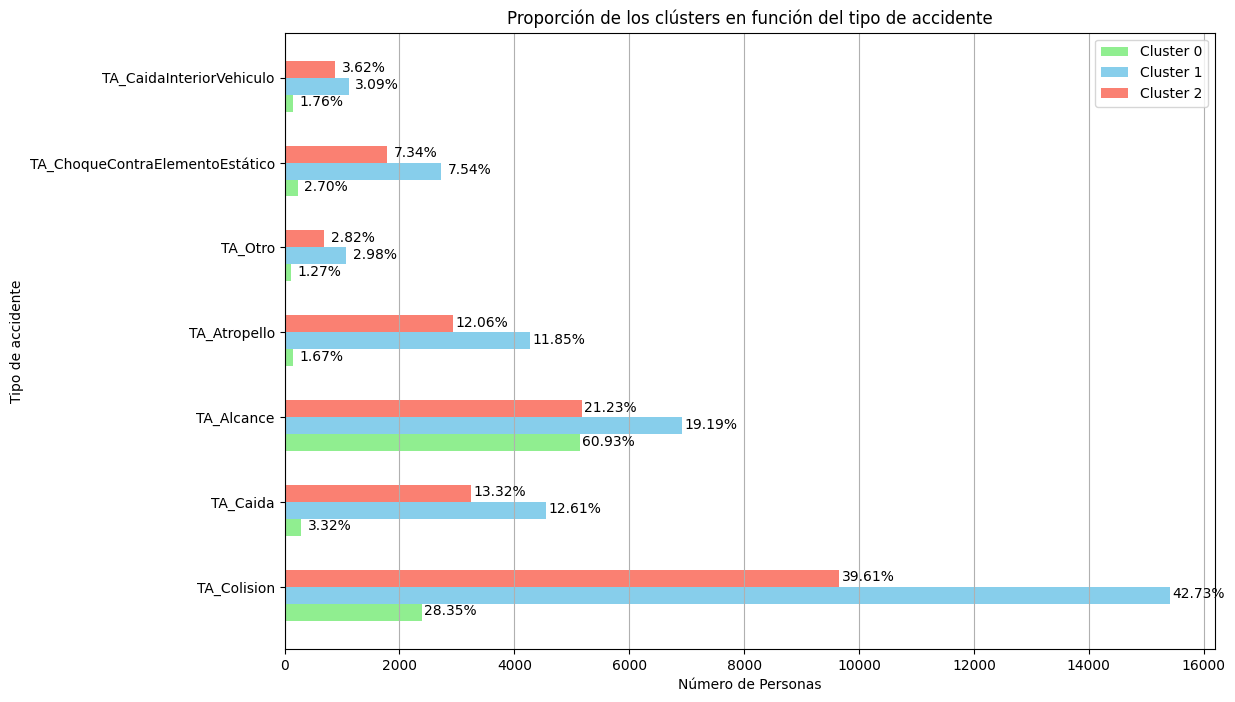

In [34]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_ta))
for i, (suma_ta, total_cluster, color) in enumerate(zip([suma_ta_0, suma_ta_1, suma_ta_2],
                                                        [total_cluster_0, total_cluster_1, total_cluster_2],
                                                        colors)):
    plt.barh([pos + i * height for pos in y], suma_ta, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Tipo de accidente')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función del tipo de accidente')
plt.yticks([pos + 1.5 * height for pos in y], columnas_ta, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_ta, total_cluster) in enumerate(zip([suma_ta_0, suma_ta_1, suma_ta_2],
                                                     [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_ta[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_ta[i] + 500, pos + j * height - 0.07, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()


##### Tipo de vehículo

<ipython-input-35-e38f028f79e5>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



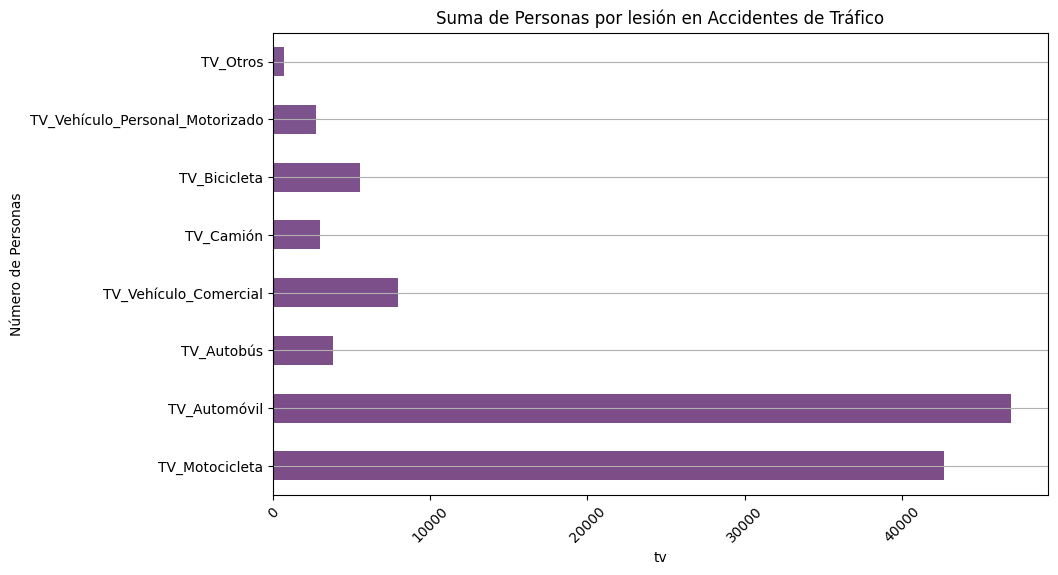

In [35]:
# Seleccionar las columnas especificadas
columnas_tv = ['TV_Motocicleta',
       'TV_Automóvil', 'TV_Autobús', 'TV_Vehículo_Comercial', 'TV_Camión',
       'TV_Bicicleta', 'TV_Vehículo_Personal_Motorizado', 'TV_Otros'
       ]

# Calcular la suma de las columnas seleccionadas
suma_tv = df_clustering_scaled[columnas_tv].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_tv.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_tv))), alpha=0.7)
plt.xlabel('tv')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [36]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_tv_0 = df_cluster_0[columnas_tv].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_tv_1 = df_cluster_1[columnas_tv].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_tv_2 = df_cluster_2[columnas_tv].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_tv = df_clustering_scaled[columnas_tv].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_tv_0)
total_cluster_1 = sum(suma_tv_1)
total_cluster_2 = sum(suma_tv_2)


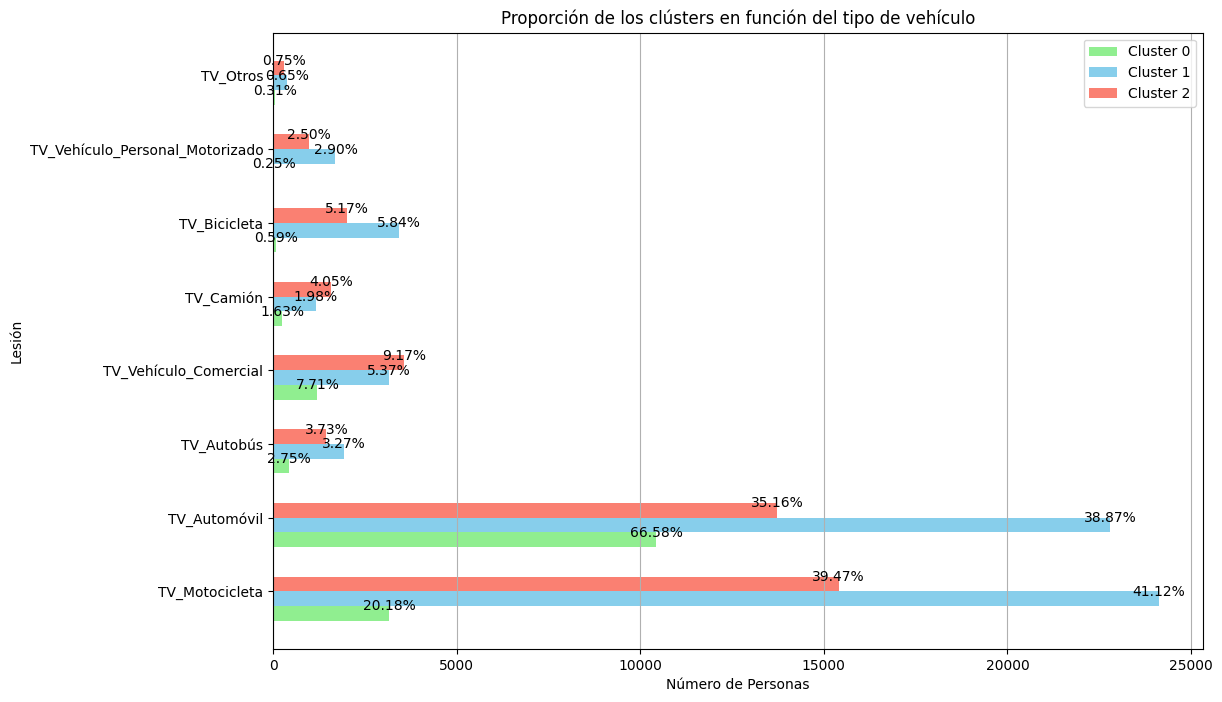

In [37]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_tv))
for i, (suma_tv, total_cluster, color) in enumerate(zip([suma_tv_0, suma_tv_1, suma_tv_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_tv, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función del tipo de vehículo')
plt.yticks([pos + 1.5 * height for pos in y], columnas_tv, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_tv, total_cluster) in enumerate(zip([suma_tv_0, suma_tv_1, suma_tv_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_tv[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_tv[i] + 0.5, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Descripción del carnet

Muy parecida a tipo de vehículo

<ipython-input-38-8f3c8a805377>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



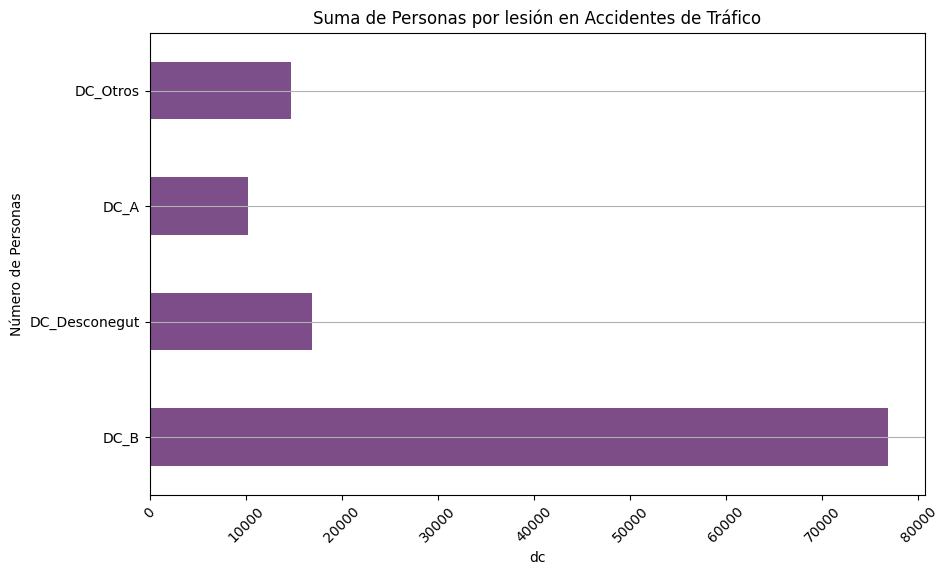

In [38]:
# Seleccionar las columnas especificadas
columnas_dc = ['DC_B', 'DC_Desconegut', 'DC_A', 'DC_Otros']

# Calcular la suma de las columnas seleccionadas
suma_dc = df_clustering_scaled[columnas_dc].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_dc.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_dc))), alpha=0.7)
plt.xlabel('dc')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [39]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_dc_0 = df_cluster_0[columnas_dc].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_dc_1 = df_cluster_1[columnas_dc].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_dc_2 = df_cluster_2[columnas_dc].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_dc = df_clustering_scaled[columnas_dc].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_dc_0)
total_cluster_1 = sum(suma_dc_1)
total_cluster_2 = sum(suma_dc_2)


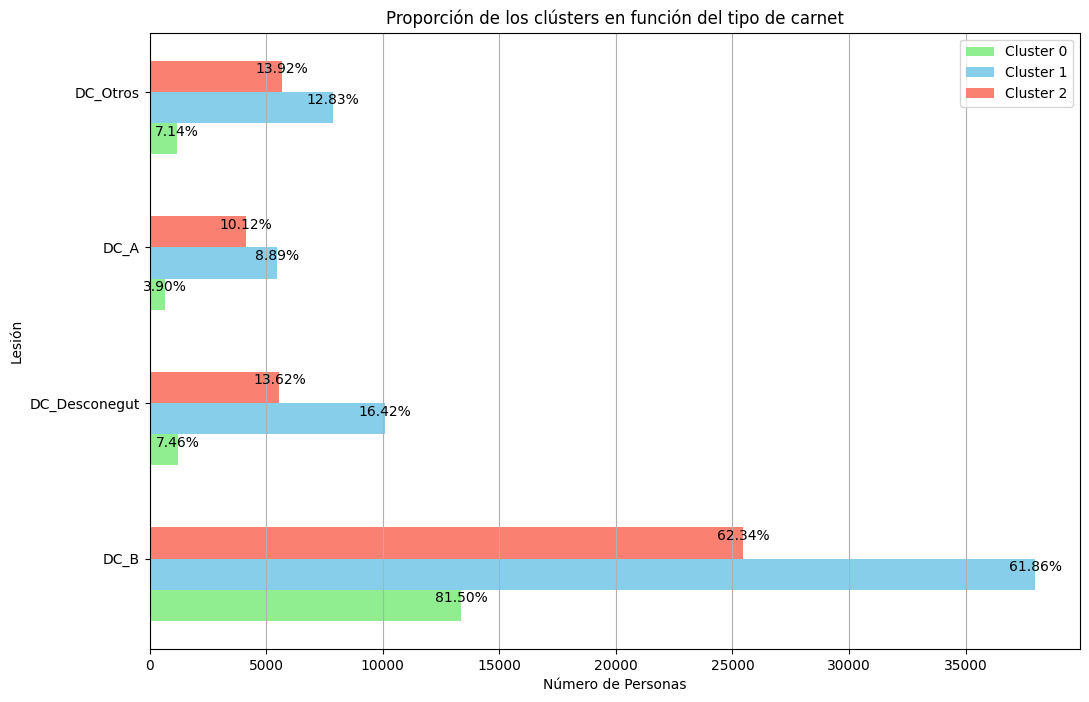

In [40]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_dc))
for i, (suma_dc, total_cluster, color) in enumerate(zip([suma_dc_0, suma_dc_1, suma_dc_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_dc, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función del tipo de carnet')
plt.yticks([pos + 1.5 * height for pos in y], columnas_dc, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_dc, total_cluster) in enumerate(zip([suma_dc_0, suma_dc_1, suma_dc_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_dc[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_dc[i] + 0.5, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Antigüedad del carnet

<ipython-input-41-0150109767c0>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



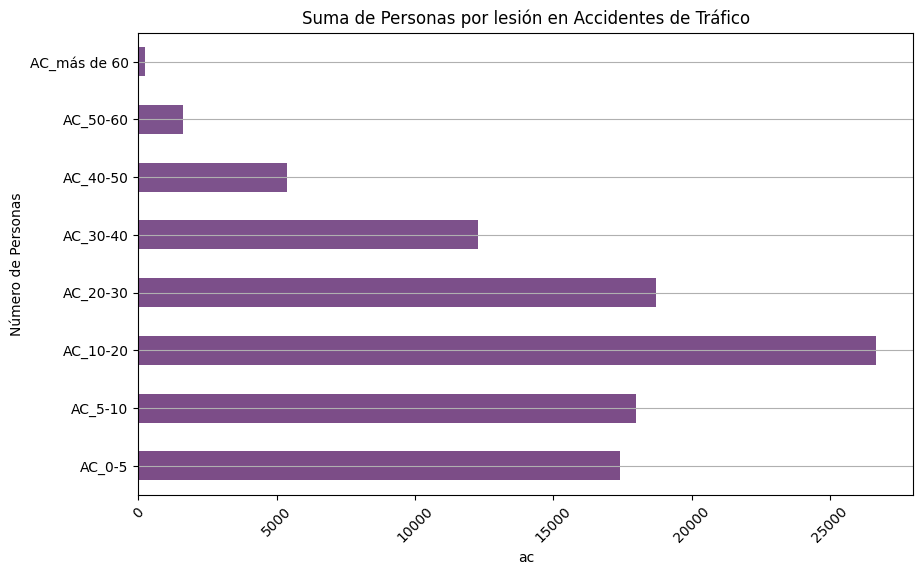

In [41]:
# Seleccionar las columnas especificadas
columnas_ac = ['AC_0-5', 'AC_5-10', 'AC_10-20',
       'AC_20-30', 'AC_30-40', 'AC_40-50', 'AC_50-60', 'AC_más de 60'
       ]

# Calcular la suma de las columnas seleccionadas
suma_ac = df_clustering_scaled[columnas_ac].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_ac.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_ac))), alpha=0.7)
plt.xlabel('ac')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [42]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_ac_0 = df_cluster_0[columnas_ac].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_ac_1 = df_cluster_1[columnas_ac].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_ac_2 = df_cluster_2[columnas_ac].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_ac = df_clustering_scaled[columnas_ac].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_ac_0)
total_cluster_1 = sum(suma_ac_1)
total_cluster_2 = sum(suma_ac_2)


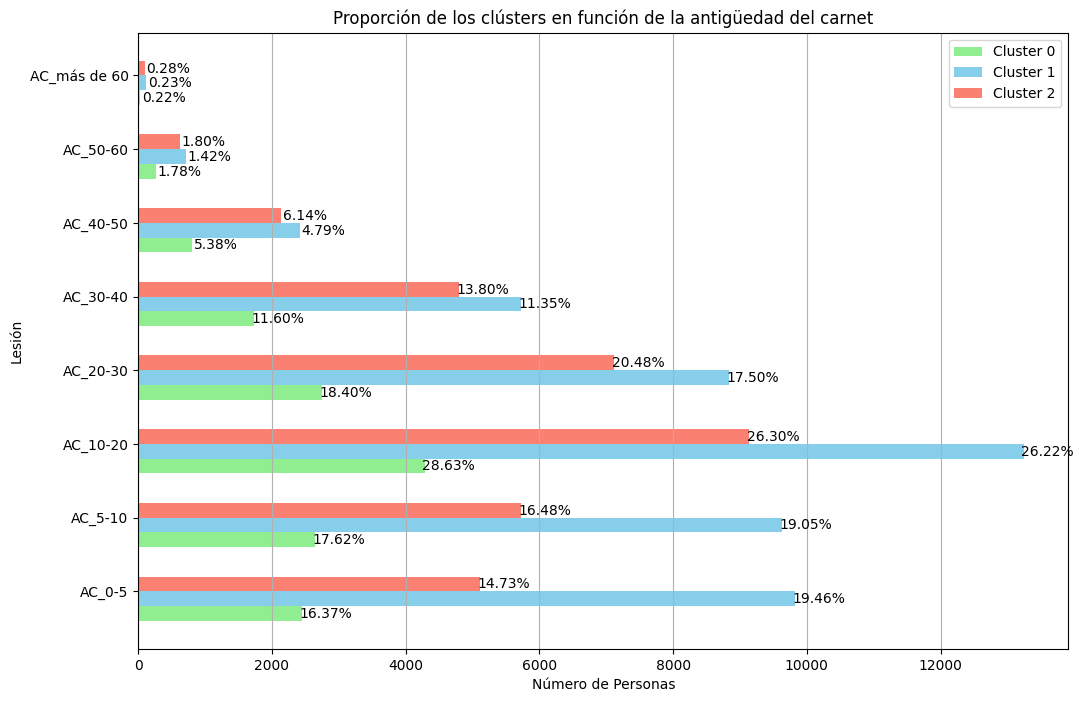

In [43]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_ac))
for i, (suma_ac, total_cluster, color) in enumerate(zip([suma_ac_0, suma_ac_1, suma_ac_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_ac, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función de la antigüedad del carnet')
plt.yticks([pos + 1.5 * height for pos in y], columnas_ac, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_ac, total_cluster) in enumerate(zip([suma_ac_0, suma_ac_1, suma_ac_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_ac[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_ac[i] + 355, pos + j * height - 0.1, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Género

<ipython-input-44-f4c7fb010ecb>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



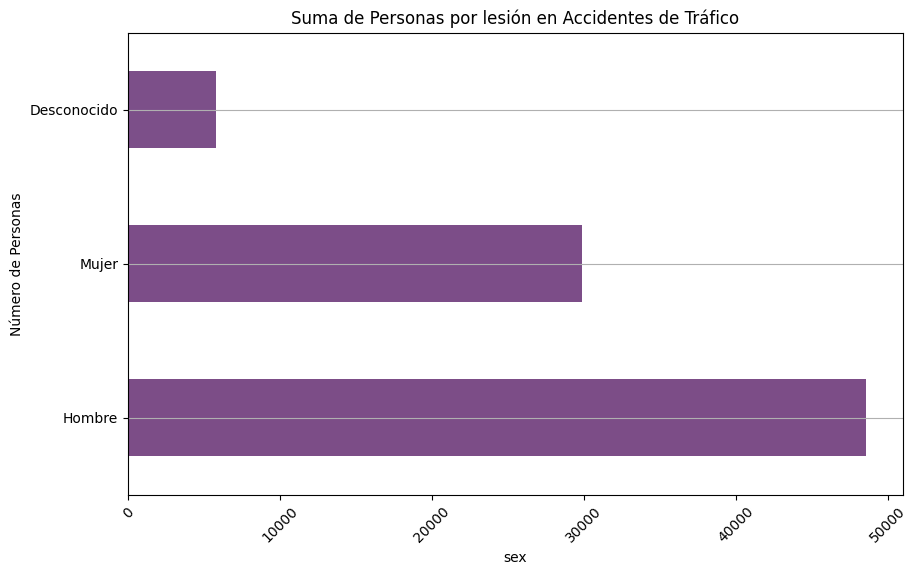

In [44]:
# Seleccionar las columnas especificadas
columnas_sex = ['Hombre', 'Mujer', 'Desconocido']

# Calcular la suma de las columnas seleccionadas
suma_sex = df_clustering_scaled[columnas_sex].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_sex.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_sex))), alpha=0.7)
plt.xlabel('sex')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [45]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_sex_0 = df_cluster_0[columnas_sex].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_sex_1 = df_cluster_1[columnas_sex].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_sex_2 = df_cluster_2[columnas_sex].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_sex = df_clustering_scaled[columnas_sex].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_sex_0)
total_cluster_1 = sum(suma_sex_1)
total_cluster_2 = sum(suma_sex_2)


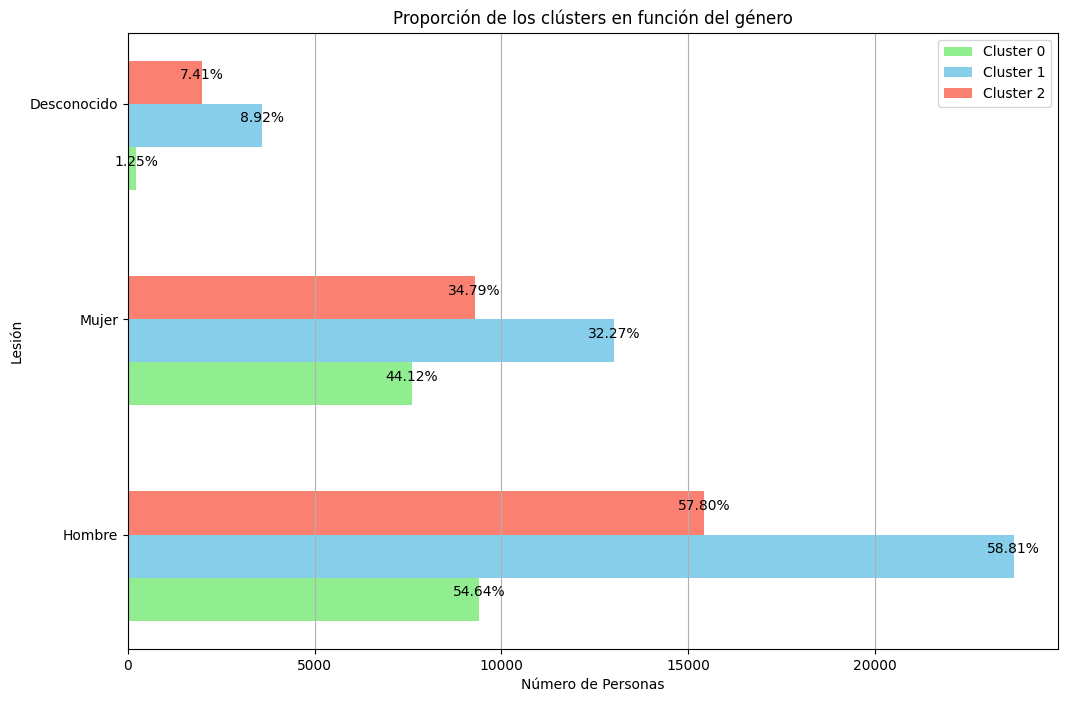

In [46]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_sex))
for i, (suma_sex, total_cluster, color) in enumerate(zip([suma_sex_0, suma_sex_1, suma_sex_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_sex, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función del género')
plt.yticks([pos + 1.5 * height for pos in y], columnas_sex, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_sex, total_cluster) in enumerate(zip([suma_sex_0, suma_sex_1, suma_sex_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_sex[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_sex[i] + 0.5, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()

##### Tipo de persona

<ipython-input-47-bb867d7e4e8b>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



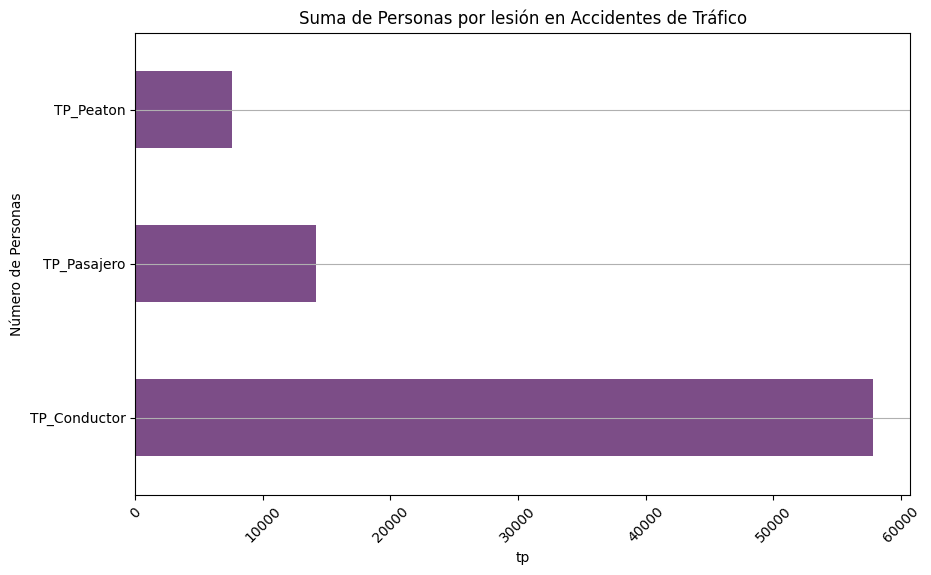

In [47]:
# Seleccionar las columnas especificadas
columnas_tp = ['TP_Conductor', 'TP_Pasajero', 'TP_Peaton'#, 'TP_Desconocido'
               ]

# Calcular la suma de las columnas seleccionadas
suma_tp = df_clustering_scaled[columnas_tp].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_tp.plot(kind='barh', color=plt.cm.get_cmap(colormap)(range(len(suma_tp))), alpha=0.7)
plt.xlabel('tp')
plt.ylabel('Número de Personas')
plt.title('Suma de Personas por lesión en Accidentes de Tráfico')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y')  # Agregar rejilla solo en el eje y
plt.show()

In [48]:
df_cluster_0 = df_clustering_scaled.query('Cluster == 0')
suma_tp_0 = df_cluster_0[columnas_tp].sum()

df_cluster_1 = df_clustering_scaled.query('Cluster == 1')
suma_tp_1 = df_cluster_1[columnas_tp].sum()

df_cluster_2 = df_clustering_scaled.query('Cluster == 2')
suma_tp_2 = df_cluster_2[columnas_tp].sum()

# Calcular la suma total de cada intervalo de edad a través de todos los clusters
suma_total_por_tp = df_clustering_scaled[columnas_tp].sum()

# Calcular los totales de personas en cada cluster
total_cluster_0 = sum(suma_tp_0)
total_cluster_1 = sum(suma_tp_1)
total_cluster_2 = sum(suma_tp_2)


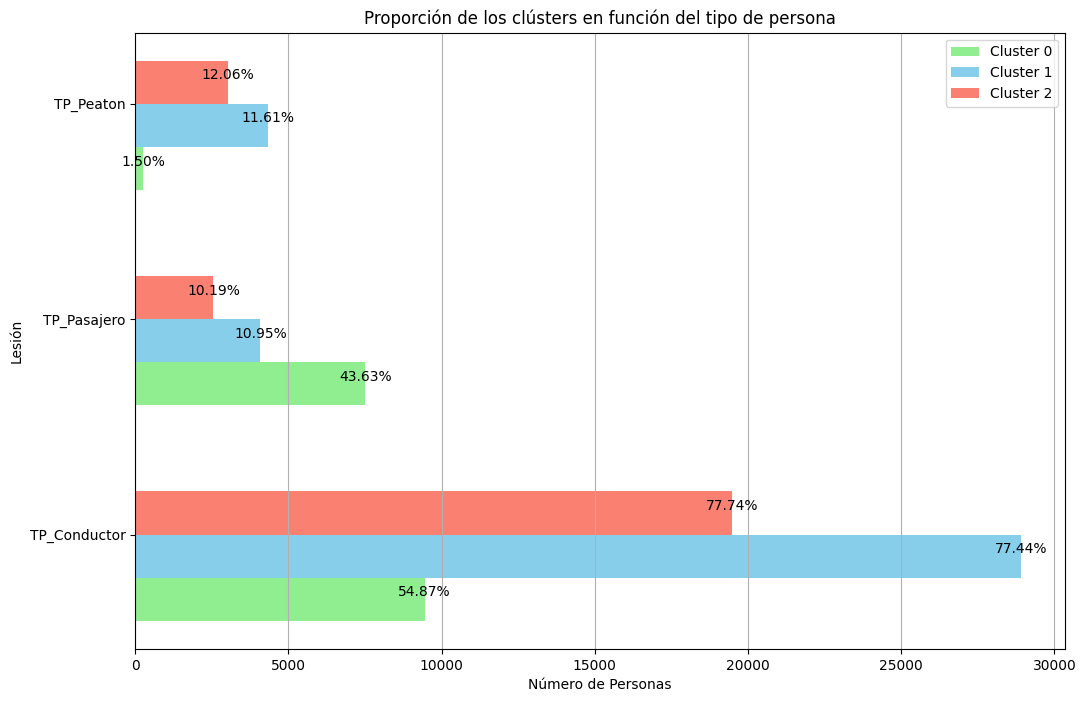

In [49]:
# Crear el gráfico de barras horizontales con proporciones por clúster
plt.figure(figsize=(12, 8))

# Graficar barras para cada clúster
height = 0.2
y = range(len(columnas_tp))
for i, (suma_tp, total_cluster, color) in enumerate(zip([suma_tp_0, suma_tp_1, suma_tp_2],
                                                            [total_cluster_0, total_cluster_1, total_cluster_2],
                                                            colors)):
    plt.barh([pos + i * height for pos in y], suma_tp, height=height, color=color, label=f'Cluster {i}')

# Agregar etiquetas y título al gráfico
plt.ylabel('Lesión')
plt.xlabel('Número de Personas')
plt.title('Proporción de los clústers en función del tipo de persona')
plt.yticks([pos + 1.5 * height for pos in y], columnas_tp, rotation=0)
plt.legend()

# Mostrar valores (porcentajes) encima de las barras
for i, pos in enumerate(y):
    for j, (suma_tp, total_cluster) in enumerate(zip([suma_tp_0, suma_tp_1, suma_tp_2],
                                                         [total_cluster_0, total_cluster_1, total_cluster_2])):
        percentage = (suma_tp[i] / total_cluster) * 100  # Calcular el porcentaje dentro de cada clúster
        plt.text(suma_tp[i] + 0.5, pos + j * height, f'{percentage:.2f}%', ha='center', va='bottom', rotation=0)

plt.grid(axis='x')
plt.show()